
# A Story of Data Discovery and Management with RDF and SPARQL

Welcome to a  journey through the landscape of RDF (Resource Description Framework) and SPARQL, where data is not just numbers and strings, but a rich tapestry of interconnected facts and relationships waiting to be explored.

## Embarking on the RDF Journey

Imagine RDF as the foundation of a vast library, where every piece of data is a book not just placed randomly on shelves, but meticulously cataloged for easy discovery. RDF allows us to define these 'books' in a way that is universally understandable, laying down a structure for the web of data.

## Navigating with SPARQL

SPARQL serves as our map and compass in this library, enabling us to find the exact data we need through its powerful query capabilities. Whether it's a simple lookup or a complex join across various datasets, SPARQL helps us chart a path to our desired information.

## Enhancing the Narrative with Tags

Tags in RDF are like keywords in a book's index, guiding us to the right information. They categorize data for better accessibility and understanding:

- **Semantic Tags** illuminate the core themes of the data.
- **Discovery Tags** connect the dots between disparate datasets.
- **Access Tags** act as gatekeepers, ensuring data privacy and security.
- **Lifecycle Tags** narrate the story of data from its inception to its conclusion.

### Metadata Categories 

#### Business/Semantic/Descriptive/Contextual Metadata:

* Provides business context, meaning, definitions, policies, and governance around data assets. Examples: Business terms, classification taxonomies, data retention rules, compliance policies, data stewardship info.
* RDF can be used to represent business/semantic metadata in a flexible, extensible way using subject-predicate-object triples to describe data concepts, relationships and rules.

  Covers Data lifecycle also 
  - Data source and creation process
  - Update schedules and frequencies
  - Data ownership and stewardship
  - Data retention and archival policies
  - Metadata based Data quality rules
  - Usage tracking and access controls
  - etc

#### Technical/Structural/Format/Physical Metadata:

* Describes the technical implementation details of data - formats, types, models, schemas, storage locations etc. Examples: Data types, database schemas, ETL logic, data profiles.
* RDF can capture some technical metadata by modeling the structure and serialization formats of datasets.

#### Operational/Process/Execution Metadata:

* Tracks the processes operating on data - job schedules, run logs, monitoring data, audit trails. Examples: Refresh schedules, system logs, performance metrics.
* RDF is less commonly used for operational metadata compared to logs/audit trails, but could potentially model process flows and execution data.

#### Social/Collaborative/User-Generated Metadata:

* Crowdsourced metadata from user annotations, comments, ratings providing interpretation and context. Examples: User annotations, issue reports, knowledge forums.
* RDF allows capturing social metadata by modeling user-generated annotations and tagging data using flexible schema-less graphs.

In summary, RDF excels at representing semantic/business metadata and social metadata due to its flexible graph data model using subject-predicate-object triples. It can also capture some technical metadata structure. However, for detailed operational/process metadata, other specialized logging/monitoring tools are more commonly used.


## Refining our Tools

We enhance our RDF toolkit by incorporating detailed tagging and leveraging SPARQL for deeper insights. Our goal is to transform raw data into a structured and insightful narrative, presented in an easily digestible format using pandas DataFrames.

## A Practical Demonstration

To bring our story to life, we employ Python to extend our RDF model with sophisticated tagging. We then use SPARQL to query this enriched dataset, showcasing the results in a clear and structured manner through DataFrames, enhancing readability and providing immediate insights into our data's story.


# RDF-based MDM

## Introduction to Active Inventory Management using RDF

Active Inventory Management using RDF (Resource Description Framework) represents a paradigm shift in how inventory data is structured, accessed, and analyzed. RDF, a standard model for data interchange on the web, enables the representation of inventory information in a machine-readable format that mirrors the complexity and interconnectedness of real-world entities. This approach facilitates a more nuanced and flexible management of inventory data, allowing businesses to easily integrate, query, and analyze diverse data sources.

By leveraging RDF, organizations can enhance their inventory management systems with semantic web technologies, leading to improved data interoperability, enhanced analytical capabilities, and more informed decision-making processes. This notebook delves into the core concepts behind using RDF for active inventory management, highlighting the methodologies for data representation, querying, visualization, and the application of semantic tags to enrich inventory data.

## RDF and Its Role in Inventory Management

RDF (Resource Description Framework) is a standard model for data interchange on the web, enabling the representation of information in a structured way. In the context of inventory management, RDF allows for the detailed description of items, their attributes, and relationships with other items, using URIs (Uniform Resource Identifiers) to identify each entity uniquely.

The flexibility of RDF lies in its ability to represent not just static data but also the relationships between data points, making it particularly suited for managing complex inventory systems where items may have multiple attributes and connections. RDF supports a graph-based data model, which is inherently more flexible and expressive than traditional relational databases for certain types of queries and data analysis tasks.

Using RDF for inventory management enables:
- **Enhanced Data Interoperability**: RDF's standardized format ensures data can be shared and understood across different systems, facilitating easier integration with external data sources.
- **Richer Data Representation**: The ability to model relationships and attributes in detail provides a deeper understanding of inventory items and their interconnections.
- **Advanced Query Capabilities**: RDF's query language, SPARQL, allows for complex queries that can navigate the relationships between items, offering insights that would be difficult to obtain from traditional databases.

This Jupyter Notebook demonstrates a proof-of-concept (POC) for storytelling on RDF-based Master Data Management (MDM). 
It utilizes open-source libraries to load, query, and visualize RDF data. The focus is on leveraging RDF to enrich a 
data mesh catalog with additional metadata, including schemas, glossaries, ownership, and more.

In [21]:
import pandas as pd

# Schema for Product
product_schema = {
    "Schema Type": ["Product"] * 5,  # Repeat "Product" for each row
    "Column Name": ["product_id", "product_name", "price", "category", "stock"],
    "Type": ["int", "varchar", "float", "varchar", "int"]
}

# Schema for Category
category_schema = {
    "Schema Type": ["Category"] * 2,  # Repeat "Category" for each row
    "Column Name": ["category_id", "category_name"],
    "Type": ["int", "varchar"]
}

# Combine both schemas into one DataFrame
combined_schema = {key: product_schema[key] + category_schema[key] for key in product_schema}
active_inventory_df = pd.DataFrame(combined_schema)

# Display the Active Inventory schema
print("Active Inventory Schema:")
display(active_inventory_df)


Active Inventory Schema:


,Schema Type,Column Name,Type
0,Product,product_id,int
1,Product,product_name,varchar
2,Product,price,float
3,Product,category,varchar
4,Product,stock,int
5,Category,category_id,int
6,Category,category_name,varchar


## Step 1: Setting up the Environment

To work with RDF data, we need to set up our environment with the necessary libraries. This includes installing and importing `rdflib`, a powerful library for working with RDF data in Python. We may also need additional libraries such as `networkx` and `matplotlib` for graph visualization purposes.

The following code cells will guide you through the installation (if necessary) and import of these libraries, preparing our environment for the tasks ahead.

In [22]:
# !pip install rdflib networkx matplotlib

In [23]:
import rdflib
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, FOAF, SKOS, DCTERMS
import matplotlib.pyplot as plt
import networkx as nx

## Step 2: Loading RDF Data

# RDF Graph

Here is a visualization of the RDF graph: 

![rdf_graph](rdf_graph.png)

As you can see in the graph, there are entities like:

- Product
- Category 
- Store

And relationships showing: 

- A product has attributes like ID, name, price, etc
- Categories have ID and name attributes
- Stores have attributes like ID, name, location, manager

There are also additional entities like:

- DataCatalog
- DataSchema 
- Column

Which show the schema layer relationships. 

**Tags**

The graph also shows the usage of:

- **Semantics Tags** - These are used to tag entities and define semantics. For example, `productTag` is used to tag product related entities.

- **Discovery Tags** - These are used to tag entities to aid in discovery. For example `inventoryTag` can help discover product catalog inventory related entities.

Overall this provides a high level visualization of the key RDF entities, relationships and usage of tags for this retail domain model.

In [24]:
g = rdflib.Graph()

turtle_data = '''
@prefix dct: <http://purl.org/dc/terms/> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.org/ex/> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

# Core catalog and domains

# Product dataset
<http://example.org/us/products>
  dct:title "US Product Catalog" ;
  schema:includedInDataCatalog <http://example.org/us/product-schema> ;
  dct:rightsHolder <https://retailmesh.example/group/us-retail> ;
  ex:semanticsTag ex:productTag, ex:catalogTag ;
  ex:discoveryTag ex:itemTag, ex:inventoryTag ;
  ex:dataLifecycleStage "raw" ;
  skos:prefLabel "Product Catalog"@en ;
  skos:definition "A catalog containing product specifications and pricing"@en ;
  dct:accessRights <https://policy.example/public> .

# Product schema
<http://example.org/us/product-schema>
  a schema:DataCatalog ;
  schema:name "US Product Schema" ;
  schema:dataset <http://example.org/us/products> ;
  schema:includedDataSchema <http://example.org/us/product-schema#details> .

<http://example.org/us/product-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing product attributes such as ID, name, price, category, and stock level" ;
  schema:about <http://example.org/us/product-schema#product> ;
  ex:semanticsTag ex:productTag ;
  ex:discoveryTag ex:itemTag ;
  schema:column <http://example.org/us/product-schema#product_id>, <http://example.org/us/product-schema#product_name>, <http://example.org/us/product-schema#price>, <http://example.org/us/product-schema#category>, <http://example.org/us/product-schema#stock> .

<http://example.org/us/product-schema#product_id>
  schema:name "product_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Identifier for the product"@en .

<http://example.org/us/product-schema#product_name>
  schema:name "product_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Name of the product"@en .

<http://example.org/us/product-schema#price>
  schema:name "price" ;
  schema:datatype "float" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Price of the product"@en .

<http://example.org/us/product-schema#category>
  schema:name "category" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Category of the product"@en .

<http://example.org/us/product-schema#stock>
  schema:name "stock" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:productTag ;
  skos:definition "Stock level of the product"@en .

# Additional Retail Schemas

# Categories dataset
<http://example.org/us/categories>
  dct:title "Product Categories" ;
  schema:includedInDataCatalog <http://example.org/us/category-schema> ;
  ex:semanticsTag ex:categoryTag ;
  ex:discoveryTag ex:classificationTag ;
  skos:prefLabel "Categories"@en ;
  skos:definition "A classification of products into different categories based on various attributes"@en .

# Category schema
<http://example.org/us/category-schema>
  a schema:DataCatalog ;
  schema:name "Category Schema" ;
  schema:dataset <http://example.org/us/categories> ;
  schema:includedDataSchema <http://example.org/us/category-schema#details> .

<http://example.org/us/category-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing category attributes such as ID and name" ;
  schema:about <http://example.org/us/category-schema#category> ;
  ex:semanticsTag ex:categoryTag ;
  ex:discoveryTag ex:classificationTag ;
  schema:column <http://example.org/us/category-schema#category_id>, <http://example.org/us/category-schema#category_name> .

<http://example.org/us/category-schema#category_id>
  schema:name "category_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:categoryTag ;
  skos:definition "Identifier for the category"@en .

<http://example.org/us/category-schema#category_name>
  schema:name "category_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:categoryTag ;
  skos:definition "Name of the category"@en .

# Store schema
<http://example.org/us/store-schema>
  a schema:DataCatalog ;
  schema:name "Store Schema" ;
  schema:dataset <http://example.org/us/stores> ;
  schema:includedDataSchema <http://example.org/us/store-schema#details> .

<http://example.org/us/store-schema#details>
  a schema:DataSchema ;
  schema:description "Schema detailing store attributes such as store ID, name, location, and manager" ;
  schema:about <http://example.org/us/store-schema#store> ;
  ex:semanticsTag ex:storeTag ;
  ex:discoveryTag ex:storeInventoryTag ;
  schema:column <http://example.org/us/store-schema#store_id>, <http://example.org/us/store-schema#store_name>, <http://example.org/us/store-schema#location>, <http://example.org/us/store-schema#manager> .

<http://example.org/us/store-schema#store_id>
  schema:name "store_id" ;
  schema:datatype "int" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Identifier for the store"@en .

<http://example.org/us/store-schema#store_name>
  schema:name "store_name" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Name of the store"@en .

<http://example.org/us/store-schema#location>
  schema:name "location" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Location of the store"@en .

<http://example.org/us/store-schema#manager>
  schema:name "manager" ;
  schema:datatype "varchar" ;
  ex:semanticsTag ex:storeTag ;
  skos:definition "Manager of the store"@en .

  '''

g.parse(data=turtle_data, format="turtle")

<Graph identifier=N23a95b3cd1e34f2296f73b632d08c93b (<class 'rdflib.graph.Graph'>)>

## Step 3: Querying RDF Data

In [25]:
import pandas as pd

# Assuming 'g.query' is your query execution function and it returns a result set 'qres'
qres = g.query(
    '''
    PREFIX schema: <http://schema.org/>
    SELECT ?dataset ?schema
    WHERE {
      ?dataset schema:includedInDataCatalog ?schema .
    }
    '''
)

# Initialize an empty list to store the query results
results = []

# Iterate through the query results and append them to the 'results' list
for row in qres:
    results.append({'Dataset': row.dataset, 'Schema': row.schema})

# Create a DataFrame from the results list
df = pd.DataFrame(results)

# Display the DataFrame
display(df)


,Dataset,Schema
0,http://example.org/us/products,http://example.org/us/product-schema
1,http://example.org/us/categories,http://example.org/us/category-schema


## Step 4: Visualizing the Graph

Visualizing the RDF graph is crucial for understanding the relationships and connections between different entities in our inventory. This step involves using graph visualization techniques to represent our RDF data visually. The `visualize_graph` function defined below leverages libraries like `matplotlib` and `networkx` to create a visual representation of the RDF graph, making it easier to comprehend the structure and relationships within our active inventory data.

The visualization can help identify patterns, connections, and potential areas for optimization in inventory management.

In [26]:
def visualize_graph(graph):
    G = nx.Graph()
    for subj, pred, obj in graph:
        if not (subj, obj) in G.edges():
            G.add_edge(str(subj), str(obj), label=str(pred))

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', edge_color='k', linewidths=0.5, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

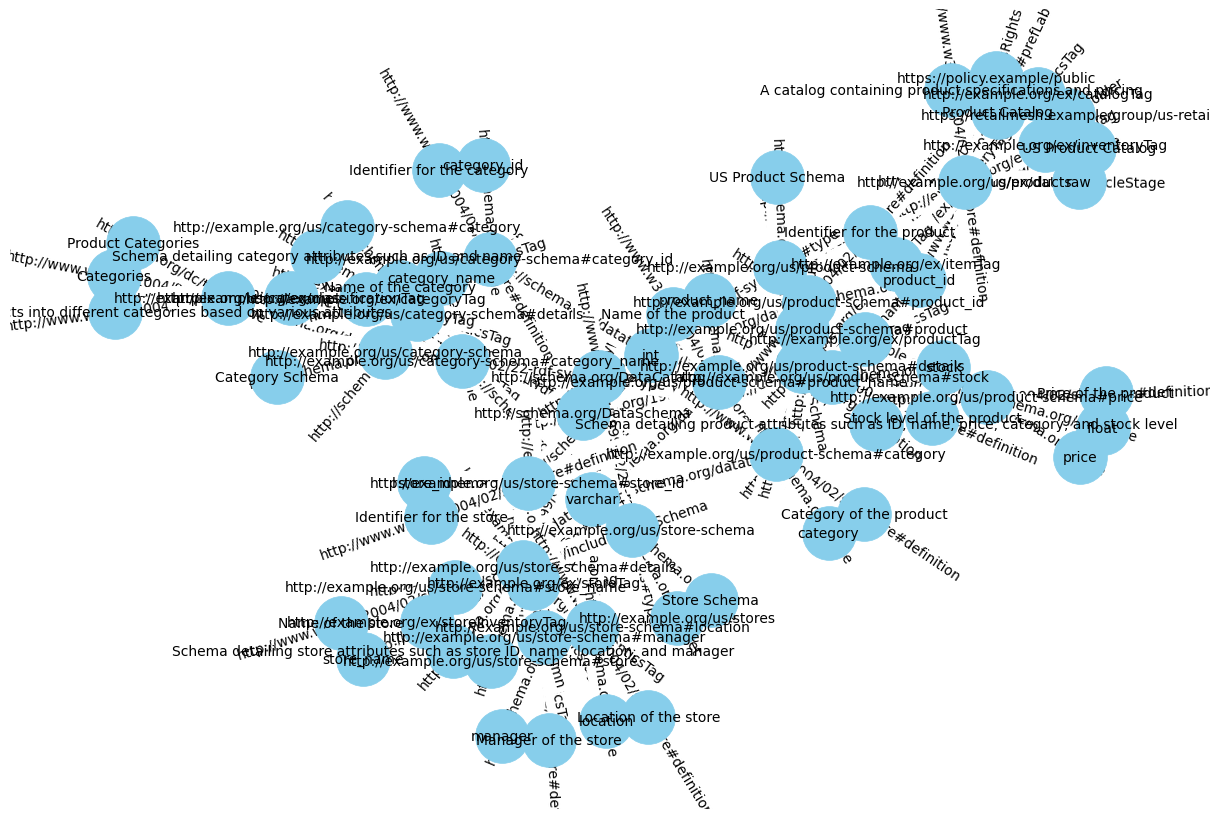

In [27]:
visualize_graph(g)

## Conclusion
This notebook provides an initial setup for exploring RDF-based MDM with Python. It covers the loading of RDF data, querying, and a basic visualization. Future steps will expand on these foundations with more complex queries and interactive visualizations.


## Levels and Tag Conventions

This section introduces the concept of levels and tag conventions in our RDF data catalog, providing a structured approach to data categorization and access control.

### Levels

- **Level 1 - Public Data**: Data that can be shared openly with no restrictions.
- **Level 2 - Internal Use Only**: Data restricted to internal stakeholders, requiring authentication for access.
- **Level 3 - Confidential Data**: Highly sensitive data that is available under strict access controls and only to specific roles.

### Tag Conventions

Tags follow a structured naming convention to ensure consistency and ease of discovery:

- **Prefix**: Identifies the category of the tag (e.g., `sec` for security, `acc` for access control).
- **Domain**: Specifies the domain or business area the tag is related to.
- **Identifier**: A unique identifier for the tag within its category and domain.

### Working Code Example: RDF and SPARQL Enhancements

Below is a Python code example that demonstrates how to extend RDF with new levels and tag conventions, and how to query this information using SPARQL.

```python
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Create a new graph
g = Graph()

# Add sample data with levels and tags
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Sample Data")))
g.add((data_uri, DC.description, Literal("A sample dataset with level and tag annotations.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Sample SPARQL query to find data by level and tag
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
  FILTER (?level = "Level 2 - Internal Use Only")
}
'''

# Run the SPARQL query
for row in g.query(query):
    print(f"Data URI: {row.data}, Title: {row.title}, Level: {row.level}, Tags: {row.tags}")
```

This code demonstrates the addition of level and tag annotations to RDF data and querying this information using SPARQL.


In [28]:
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF
import pandas as pd  # Import pandas library

# Create a new graph
g = Graph()

# Add sample data with levels and tags
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Sample Data")))
g.add((data_uri, DC.description, Literal("A sample dataset with level and tag annotations.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Sample SPARQL query to find data by level and tag
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
  FILTER (?level = "Level 2 - Internal Use Only")
}
'''

# Prepare an empty list to collect query results
results = []

# Run the SPARQL query and collect the results
for row in g.query(query):
    results.append({
        "Data URI": row.data,
        "Title": row.title,
        "Level": row.level,
        "Tags": row.tags
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
display(df)


,Data URI,Title,Level,Tags
0,http://example.org/data,Sample Data,Level 2 - Internal Use Only,sec:finance:confidential


In [29]:

import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Initialize the graph
g = Graph()

# Adding data with enhanced tagging
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Enhanced Data")))
g.add((data_uri, DC.description, Literal("Demonstrating enriched RDF data with tags.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 2 - Internal Use Only")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:finance:confidential")))

# Define a SPARQL query to retrieve data with tags
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
}
'''

# Execute the query and display results in a DataFrame
results = []
for row in g.query(query):
    results.append({
        "Data URI": str(row.data),
        "Title": str(row.title),
        "Level": str(row.level),
        "Tags": str(row.tags),
        "Tag Type": "Access" if "sec" in str(row.tags) else "Other"
    })

df = pd.DataFrame(results)
display(df)


,Data URI,Title,Level,Tags,Tag Type
0,http://example.org/data,Enhanced Data,Level 2 - Internal Use Only,sec:finance:confidential,Access


In [30]:

import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import DC, FOAF

# Initialize the graph with enhanced tagging and RDF model
g = Graph()

# Adding data to our RDF graph
data_uri = URIRef("http://example.org/data")
g.add((data_uri, RDF.type, FOAF.Document))
g.add((data_uri, DC.title, Literal("Comprehensive Data")))
g.add((data_uri, DC.description, Literal("A detailed example of RDF data with enhanced tagging.")))
g.add((data_uri, URIRef("http://example.org/terms/level"), Literal("Level 3 - Confidential Data")))
g.add((data_uri, URIRef("http://example.org/terms/tags"), Literal("sec:hr:sensitive")))

# Define a comprehensive SPARQL query to retrieve and categorize data
query = '''
SELECT ?data ?title ?level ?tags
WHERE {
  ?data a foaf:Document .
  ?data dc:title ?title .
  ?data <http://example.org/terms/level> ?level .
  ?data <http://example.org/terms/tags> ?tags .
}
'''

# Execute the query and display results in a DataFrame for a cleaner presentation
results = []
for row in g.query(query):
    results.append({
        "Data URI": str(row.data),
        "Title": str(row.title),
        "Level": str(row.level),
        "Tags": str(row.tags),
        "Tag Type": "Access" if "sec" in str(row.tags) else "Other"
    })

df = pd.DataFrame(results)
display(df)


,Data URI,Title,Level,Tags,Tag Type
0,http://example.org/data,Comprehensive Data,Level 3 - Confidential Data,sec:hr:sensitive,Access



# Extended Documentation and Examples
This section extends the existing documentation to cover all tag types and levels, incorporating dot notation conventions for tag naming.

## Tag Types
- **Semantic Tags**: Capture the core meaning of the data.
- **Discovery Tags**: Facilitate connections between different pieces of data for analysis.
- **Access Tags**: Define the access level of the data (e.g., public, private, confidential).
- **Lifecycle Tags**: Manage the data through its lifecycle stages (e.g., active, archived, deleted).

## Dot Notation Conventions
Using dot notation for tag naming follows the structure: `[Namespace].[Category].[Subcategory].[...].[SpecificTag]`, providing a clear hierarchy and structure to the tags, enhancing readability and manageability.

Example: `finance.revenue.2021.Q1` signifies financial revenue data for the first quarter of 2021.

## Implementation Example
Below is an example of how these tags can be applied within a data catalog system, using RDF and SPARQL queries to classify and retrieve data assets based on their assigned tags.


In [31]:

# Example of RDF tagging using SPARQL for Semantic, Discovery, Access, and Lifecycle Tags

# Semantic Tagging Example
semantic_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:semanticTag ?object .
}
"""

# Discovery Tagging Example
discovery_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:discoveryTag ?object .
}
"""

# Access Tagging Example
access_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:accessTag ?object .
}
"""

# Lifecycle Tagging Example
lifecycle_query = """
PREFIX ex: <http://example.org/rdf/>
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ex:lifecycleTag ?object .
}
"""

# These SPARQL queries can be executed against an RDF dataset to retrieve data based on the specified tags.


In [32]:

from rdflib import Graph, Literal, RDF, URIRef
import pandas as pd

# Create an in-memory RDF Graph
g = Graph()

# Define namespaces
NS = URIRef("http://example.org/ns/")
g.bind("ns", NS)

# Add triples to the graph (extending the RDF with more data)
g.add((URIRef(NS + "Resource1"), RDF.type, URIRef(NS + "SemanticTag")))
g.add((URIRef(NS + "Resource1"), URIRef(NS + "discoveryTag"), Literal("DiscoveryData1")))
g.add((URIRef(NS + "Resource2"), RDF.type, URIRef(NS + "AccessTag")))
g.add((URIRef(NS + "Resource2"), URIRef(NS + "lifecycleTag"), Literal("LifecycleData1")))

# Example SPARQL queries to retrieve data from the extended RDF graph
queries = {
    "Semantic Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/SemanticTag>)
    }''',
    "Discovery Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/discoveryTag>)
    }''',
    "Access Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/AccessTag>)
    }''',
    "Lifecycle Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/lifecycleTag>)
    }'''
}

# Function to execute SPARQL query and return results as DataFrame
def execute_sparql_query(graph, query):
    results = graph.query(query)
    data = []
    for row in results:
        data.append(row)
    return pd.DataFrame(data, columns=["Subject", "Predicate", "Object"])

# Execute the SPARQL queries and display results
for name, query in queries.items():
    df = execute_sparql_query(g, query)
    print(f"\n{name} Results:")
    display(df)  # Use display for Jupyter notebooks to output DataFrames



Semantic Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/SemanticTag



Discovery Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://example.org/ns/discoveryTag,DiscoveryData1



Access Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/AccessTag



Lifecycle Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://example.org/ns/lifecycleTag,LifecycleData1


In [33]:

from rdflib import Graph, Literal, RDF, URIRef
import pandas as pd

# Assuming 'g' is the RDF graph created and loaded with data in previous steps

# Define namespaces and add triples to the graph as per the user's instructions
NS = URIRef("http://example.org/ns/")
g.bind("ns", NS)

# Example SPARQL queries to retrieve data from the RDF graph
queries = {
    "Semantic Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/SemanticTag>)
    }''',
    "Discovery Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/discoveryTag>)
    }''',
    "Access Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = rdf:type && ?o = <http://example.org/ns/AccessTag>)
    }''',
    "Lifecycle Tags": '''
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = <http://example.org/ns/lifecycleTag>)
    }'''
}

# Function to execute SPARQL query and return results as DataFrame
def execute_sparql_query(graph, query):
    results = graph.query(query)
    data = []
    for row in results:
        data.append(row)
    return pd.DataFrame(data, columns=["Subject", "Predicate", "Object"])

# Execute the SPARQL queries and display results
for name, query in queries.items():
    df = execute_sparql_query(g, query)
    print(f"\n{name} Results:")
    display(df)  # Use display for Jupyter notebooks to output DataFrames



Semantic Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/SemanticTag



Discovery Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource1,http://example.org/ns/discoveryTag,DiscoveryData1



Access Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://example.org/ns/AccessTag



Lifecycle Tags Results:


,Subject,Predicate,Object
0,http://example.org/ns/Resource2,http://example.org/ns/lifecycleTag,LifecycleData1


In [34]:
from rdflib import Namespace, Graph
import pandas as pd

# Create a graph and parse turtle data
g = Graph()
g.parse(data=turtle_data, format="turtle")

# Define namespace
EX = Namespace("http://example.org/ex/")
g.bind("ex", EX)

# Revised SPARQL query to extract tag and its type based on the predicate
query = """
SELECT ?tag (SAMPLE(?type) AS ?type)
WHERE {
 ?s ?p ?tag .
 VALUES (?p ?type) {
  (ex:semanticsTag "semantics")
  (ex:discoveryTag "discovery")
  (ex:dataLifecycleStage "datalifecycle")
  # Add more mappings as needed
 }
}
GROUP BY ?tag
"""

results = g.query(query)

# Convert results to DataFrame
tags_df = pd.DataFrame(results, columns=['Tag', 'Tag Type'])

# Remove namespace from Tag column
tags_df['Tag'] = tags_df['Tag'].apply(lambda x: x.replace(str(EX), ""))
# Remove namespace from Tag column
tags_df['Tag'] = tags_df['Tag'].apply(lambda x: x.replace(str(EX), ""))


# This example demonstrates a simple approach. Adapt as needed for actual data relationships.

# Concatenate the DataFrames
# Note: This step assumes that the number of tags matches the number of rows in active_inventory_df or is adjusted accordingly.
extended_inventory_df = pd.concat([active_inventory_df.reset_index(drop=True), tags_df.reset_index(drop=True)], axis=1)

display(extended_inventory_df)


,Schema Type,Column Name,Type,Tag,Tag Type
0,Product,product_id,int,productTag,semantics
1,Product,product_name,varchar,catalogTag,semantics
2,Product,price,float,raw,datalifecycle
3,Product,category,varchar,storeTag,semantics
4,Product,stock,int,categoryTag,semantics
5,Category,category_id,int,storeInventoryTag,discovery
6,Category,category_name,varchar,classificationTag,discovery
7,NaN,NaN,NaN,inventoryTag,discovery
8,NaN,NaN,NaN,itemTag,discovery


## Conclusion and Summary

Through the detailed exploration of RDF and its application in active inventory management, this notebook has highlighted the transformative potential of semantic web technologies in organizing, managing, and analyzing inventory data. The adoption of RDF facilitates a more interconnected and flexible representation of inventory, enabling enhanced data interoperability, richer data representation, and advanced analytical capabilities through complex querying and visualization techniques.

The application of tags and the preparation of a proper catalog are crucial steps in leveraging the full potential of RDF, allowing for the efficient organization and accessibility of inventory data. By embracing RDF, businesses can achieve a more nuanced understanding of their inventory, leading to more informed decision-making and strategic advantages in inventory management.

In conclusion, the utilization of RDF in active inventory management offers significant benefits, including improved data richness, better interoperability, and enhanced analytical insights. As organizations continue to navigate the complexities of inventory management, the principles and methodologies outlined in this notebook provide a robust framework for leveraging semantic web technologies to achieve operational excellence and strategic success.

## Applying Tags to Active Inventory and Preparing a Proper Catalog

### Applying Tags to Active Inventory
Tagging is an essential step in organizing inventory data, allowing for easier retrieval, categorization, and analysis. By applying tags based on attributes, categories, or any other relevant criteria, we can enhance the semantic richness of our inventory data. This process involves extending our RDF model to include these tags, thereby enabling more sophisticated queries and analyses.

### Preparing a Proper Catalog
With our inventory data structured and tagged in RDF, the next step is to prepare a proper catalog. This involves organizing the data into a user-friendly and accessible format, potentially through a web interface or a searchable database. The catalog should allow users to easily browse, search, and interact with the inventory data, leveraging the semantic capabilities of RDF to provide dynamic filtering, sorting, and recommendations.

### Conclusion
This notebook has walked you through the process of using RDF for active inventory management, from setting up the environment and loading data to querying, visualizing, and enhancing data organization with tags. The final step of preparing a proper catalog ensures that the managed inventory is accessible and usable, showcasing the practical benefits of semantic web technologies in real-world applications.


## Automated Data Quality Rules Generation using Hugging Face Transformers

### Introduction
This notebook outlines an end-to-end process for generating semantic tags for dataset columns using a model from Hugging Face. These tags are then used to create and apply data quality rules to a sample dataset.

### Setup
First, we will install and import the necessary libraries for our task.

In [35]:
# !pip install transformers
# !pip install pyarrow
# !pip install torch torchvision torchaudio
# !pip install tensorflow
# !pip install jax jaxlib
# !pip install flax


### Loading the Model
We load a zero-shot classification model which will be used to predict semantic tags for our dataset columns.

In [36]:
from transformers import pipeline

# Load a zero-shot-classification pipeline
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

### Sample Dataset
We will create a sample dataset to demonstrate the generation and application of DQ rules.

In [37]:
sample_data = {
    'Product_Name': ['T-shirt', 'Jeans', '', 'Socks', 'Jacket'],
    'Price': [19.99, 49.99, 24.99, 5.99, -1],
    'Stock_Count': [120, 90, -5, 200, 60]
}
df = pd.DataFrame(sample_data)
df

,Product_Name,Price,Stock_Count
0,T-shirt,19.99,120
1,Jeans,49.99,90
2,,24.99,-5
3,Socks,5.99,200
4,Jacket,-1.00,60


### Generate Semantic Tags
For each column, we generate semantic tags that are relevant to the type of data contained in that column.

In [38]:
def generate_semantic_tags(column_name):
    # Define potential tags
    potential_tags = ['required', 'numeric_positive', 'integer_non_negative', 'unique', 'datetime', 'text']
    # Use the classifier to get the most likely tags
    result = classifier(column_name, potential_tags, multi_label=True)
    return result['labels'][0]  # Return the top tag for simplicity in this example

# Note: This function now requires an actual call to a classifier pipeline from Hugging Face.
# Ensure you have internet access and the transformers library installed to use this function.

### Define Data Quality Rules
Based on the generated tags, we define a set of DQ rules to apply to the dataset.

In [39]:
def apply_dq_rules(df, column_name, tag):
    if tag == 'required':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if pd.notnull(x) and x != '' else 'Invalid')
    elif tag == 'numeric_positive':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if x > 0 else 'Invalid')
    elif tag == 'integer_non_negative':
        df[column_name + '_DQ'] = df[column_name].apply(lambda x: 'Valid' if pd.notnull(x) and isinstance(x, int) and x >= 0 else 'Invalid')
    # Here you can add more DQ rules based on other tags
    return df

### Apply Data Quality Rules
We now apply the defined DQ rules to our sample dataset.

In [40]:
for column in df.columns:
    tag = generate_semantic_tags(column)
    df = apply_dq_rules(df, column, tag)
df

,Product_Name,Price,Stock_Count,Product_Name_DQ,Stock_Count_DQ
0,T-shirt,19.99,120,Valid,Valid
1,Jeans,49.99,90,Valid,Valid
2,,24.99,-5,Invalid,Valid
3,Socks,5.99,200,Valid,Valid
4,Jacket,-1.00,60,Valid,Valid


### Conclusion
The final DataFrame displayed above shows the original data along with the results of the DQ rules application. This process can be scaled and automated to enhance data quality across various datasets.

## Introduction to RDF in Turtle Format
RDF (Resource Description Framework) is a standard model for data interchange on the Web. RDF has features that facilitate data merging even if the underlying schemas differ, and it specifically supports the evolution of schemas over time without requiring all the data consumers to be changed. Turtle (Terse RDF Triple Language) is a compact, human-readable format for RDF data.

## Storing RDF in Annoy
Annoy (Approximate Nearest Neighbors Oh Yeah) is a C++ library with Python bindings to search for points in space that are close to a given query point. It's particularly useful for very large datasets. For storing RDF data in Annoy, the RDF triples need to be converted into a numerical representation that Annoy can work with. This involves encoding RDF triples or their components into vectors.

## Querying RDF Data Stored in Annoy
Once RDF data is stored in Annoy, querying involves using Annoy's search capabilities to find nearest neighbors for a given vector representation of a query. This process can be used to retrieve tags that are relevant to a specific query in the context of an active inventory schema.

## Examples
This section will provide detailed examples showing the complete workflow from preparing RDF data in Turtle format, converting it for Annoy, storing it, and finally querying the stored data to retrieve relevant tags.

## Conclusion and Next Steps
Storing RDF data in Annoy and querying it for relevant tags presents a novel approach to handling inventory management and other related tasks. This method leverages the flexibility of RDF for data representation and the efficiency of Annoy for data retrieval. Further exploration can involve integrating this system into larger data management or recommendation systems.


## Retrieval-Augmented Generation (RAG) for RDF Data

This section introduces a Retrieval-Augmented Generation (RAG) approach that leverages RDF (Resource Description Framework) data to enhance tagging capabilities. Using Annoy (Approximate Nearest Neighbors Oh Yeah), we load RDF data from turtle (.ttl) files. The goal is to take a schema or query similar to the RDF data and return relevant tags.

### Steps:
1. **Extract RDF Data from Turtle Files**: Utilize an RDF parsing library to extract data from turtle files.
2. **Prepare RDF Data for Annoy Indexing**: Transform RDF triples into a suitable format for Annoy indexing.
3. **Build Annoy Index with RDF Data**: Create an Annoy index to facilitate efficient similarity searches.
4. **Implement Retrieval Function**: Develop a function that inputs a schema and retrieves similar RDF-based tags.
5. **Demonstrate Usage**: Provide examples to demonstrate the retrieval of tags based on RDF data.


In [41]:
import rdflib
import numpy as np
from annoy import AnnoyIndex
import pandas as pd

# Assuming turtle_data is defined above
g = rdflib.Graph()
g.parse(data=turtle_data, format="turtle")

# Prepare RDF Data for Annoy Indexing
entities = list(set(g.subjects()))
entity_vectors = {entity: np.random.rand(100) for entity in entities}

# Build Annoy Index with RDF Data
dimension = 100
index = AnnoyIndex(dimension, 'angular')
for i, entity in enumerate(entities):
    index.add_item(i, entity_vectors[entity])
index.build(10)

# Implement Retrieval Function
def retrieve_similar_tags(query_entity_uri, n=1):
    if query_entity_uri not in entity_vectors:
        return pd.DataFrame(columns=["Entity", "Property", "Value", "Query"])  # Ensure columns consistency

    query_vector = entity_vectors[query_entity_uri]
    nearest_ids = index.get_nns_by_vector(query_vector, n, include_distances=False)

    results = []
    for nearest_id in nearest_ids:
        nearest_entity = entities[nearest_id]
        entity_tags = g.triples((nearest_entity, None, None))
        for s, p, o in entity_tags:
            results.append({
                "Entity": s.n3(g.namespace_manager).split('/')[-1].rstrip('>'),
                "Property": p.n3(g.namespace_manager).split('/')[-1].rstrip('>'),
                "Value": o.n3(g.namespace_manager).split('/')[-1].rstrip('>'),
                "Query": query_entity_uri.n3(g.namespace_manager).split('/')[-1].rstrip('>')
            })

    return pd.DataFrame(results)

# Define specific schemas and columns for example queries
example_queries = [
    rdflib.URIRef("http://example.org/us/product-schema"),
    rdflib.URIRef("http://example.org/us/product-schema#price"),
    rdflib.URIRef("http://example.org/us/category-schema")
]

# Consolidate results from all queries in a single DataFrame
all_results = pd.DataFrame()
for query in example_queries:
    tags_df = retrieve_similar_tags(query, 3)  # Retrieve tags for 3 most similar entities
    all_results = pd.concat([all_results, tags_df], ignore_index=True)

# Display the consolidated DataFrame
all_results


,Entity,Property,Value,Query
0,product-schema,rdf:type,schema1:DataCatalog,product-schema
1,product-schema,schema1:name,"""US Product Schema""",product-schema
2,product-schema,schema1:dataset,products,product-schema
3,product-schema,schema1:includedDataSchema,product-schema#details,product-schema
4,category-schema#category_name,schema1:name,"""category_name""",product-schema
5,category-schema#category_name,schema1:datatype,"""varchar""",product-schema
6,category-schema#category_name,ex:semanticsTag,ex:categoryTag,product-schema
7,category-schema#category_name,skos:definition,"""Name of the category""@en",product-schema
8,product-schema#product_id,schema1:name,"""product_id""",product-schema
9,product-schema#product_id,schema1:datatype,"""int""",product-schema


# Pioneering Centralized Tagging with RDFAnnoyIndexer

## Introduction to the Tagging Ecosystem

The `RDFAnnoyIndexer` serves as a cornerstone in crafting a centralized tagging repository, laying the groundwork for consistent semantic classification across an organization. By leveraging RDF data and Annoy's approximate nearest neighbor search, it enables a sophisticated system for automated tagging and classification, critical for comprehensive data governance.

## Strategic Role and Innovation

### Centralized Semantic Tagging
At its core, `RDFAnnoyIndexer` is instrumental in developing a unified tagging service that aligns with the enterprise's data governance strategy. This service is designed to classify data assets consistently, utilizing standardized tags derived from a central ontology. This ensures a unified semantic understanding across various platforms and systems, enhancing data security, compliance, analytics, and lifecycle management.

### Ontology-Based Tagging Benefits
The methodology employed by `RDFAnnoyIndexer` leverages ontology-based tagging, offering significant advantages:

- **Consistent Semantics:** Establishes a common vocabulary, aligning meaning across disparate tools and systems.
- **Interoperable Metadata:** Facilitates the discovery and integration of data across silos, breaking down barriers to information access.
- **Unified Access Controls:** Employs centralized tags to drive comprehensive access policies, streamlining governance.
- **Automated Governance:** Utilizes tags as triggers for automated actions across data platforms, simplifying complex governance tasks.

### Practical Application and Tag Derivation
The `RDFAnnoyIndexer` demonstrates its utility through practical applications, including the automated derivation of tags from RDF/ontology data. This process is essential for populating gazetteers—authoritative sources of domain-specific terms and entities that enrich the tagging service with accurate, domain-specific semantics. By mapping these terms to data assets, the service automatically applies relevant tags, facilitating precise and meaningful classification.

## Enabling Data Governance Capabilities

The integration of `RDFAnnoyIndexer` within the tagging service architecture targets primarily business/semantic/descriptive/contextual metadata. Starting with data lifecycle contextual information modeled as RDF/Ontology, this approach brings a nuanced understanding of the active inventory's lifecycle stages, crucial for managing data lakes and lakehouses effectively.

### Gazetteers and Domain-Specific Vocabularies
Gazetteers play a pivotal role, offering controlled vocabularies that feed into the enterprise ontology. This not only ensures semantic consistency but also supports the automation of large-scale semantic classification of data, enriching assets with meaningful tags that power metadata-driven governance workflows.

### Comprehensive Tagging Service Architecture
The architecture and process flow of the tagging service, highlighted by the `RDFAnnoyIndexer`, underline the seamless integration of schema understanding, machine learning embeddings, and tagging patterns. This sophisticated approach automates the tagging of items within the active inventory, ensuring tags are accurately applied and propagated, facilitating effective data retrieval, organization, and governance.

![rdf_graph](tagging_service.png)

- **Start: RDF/Ontology Data**: The entry point where RDF or ontology-based data is introduced into the system.
- **TaggingService Initialization**: The process begins with initializing the Tagging Service, setting up the environment for RDF data processing.
- **RDFAnnoyIndexer**:
    - **Load RDF Data and Parse**: RDF data is loaded and parsed to understand the semantic structure and relationships.
    - **Generate Entity Vectors**: Each RDF entity is transformed into a vector in a high-dimensional space, facilitating similarity analysis.
    - **Build Annoy Index**: These vectors are indexed using Annoy to enable efficient similarity searches.
    - **Retrieve Similar Tags**: Similar tags are retrieved based on vector similarity, paving the way for semantic tagging.
- **Gazetteer Integration**: Integrates with gazetteers, authoritative lists of names and terms, to ensure that tags are accurate and standardized.
- **Tag Application to Data Assets**: Tags derived from the RDFAnnoyIndexer and gazetteers are applied to data assets, classifying and enriching them with semantic metadata.
- **Metadata-Driven Governance Workflows**: The applied tags facilitate metadata-driven governance workflows, enhancing data security, compliance, analytics, and lifecycle management.
- **End: Enhanced Data Governance**: The process culminates in a state of enhanced data governance, where data assets are efficiently managed and governed across the organization.

#### Algorithm

- **Initialize RDFAnnoyIndexer**
  - Set up with a specified vector space dimension (default 100).
  - Initialize an empty RDF graph (`rdflib.Graph`).
  - Create an Annoy index for angular distance metric with the specified dimension.
  - Prepare empty lists for entities and a dictionary for entity vectors.

- **Load RDF Data**
  - Parse RDF data from a Turtle formatted string.
  - Identify unique entities as subjects within the RDF graph.
  - Generate random vectors for each entity to represent them in the specified dimensional space.

- **Build Annoy Index**
  - Re-initialize the Annoy index with the same dimension and 'angular' metric.
  - Add each entity's vector to the Annoy index.
  - Build the index with 10 trees for efficient similarity search.

- **Retrieve Similar Tags**
  - For a given entity URI, find its vector in the entity_vectors dictionary.
  - Use the Annoy index to retrieve 'n' nearest neighbors based on vector similarity.
  - For each similar entity found, extract its RDF triples (subject, predicate, object).
  - Simplify and clean entity, property, and value strings for readability.
  - Generate and append a tag based on entity string and query entity URI conventions.
  - Return results as a pandas DataFrame with columns for Entity, Property, Value, Query, and Tag.

- **Generate Tag**
  - Define namespace based on the presence of "member" in the query entity URI.
  - Determine level2 class based on the presence of "Personal" in the entity string.
  - Extract level3 class from the entity string.
  - Construct and return a tag combining namespace, level2, and level3 class.

- **Practical Application**
  - Example RDF data in Turtle format is provided to illustrate the tagging of data assets with sensitivity and geography tags.
  - The RDFAnnoyIndexer is initialized, RDF data is loaded, and similar tags are retrieved for a specified entity URI, demonstrating the process of semantic tagging and classification.


## Conclusion

By laying the foundations for a centralized tagging repository, the `RDFAnnoyIndexer` marks a significant step forward in achieving consistent semantic classification and robust data governance. It exemplifies how ontology-based tagging, supported by advanced data processing and nearest neighbor search algorithms, can revolutionize data management practices, enabling organizations to navigate and leverage their data landscapes more effectively than ever before.


In [4]:
import rdflib
import pandas as pd
from annoy import AnnoyIndex
from transformers import BertTokenizer, BertModel

class RDFAnnoyIndexer:
    def __init__(self, dimension=768):  # Correct dimension for BERT base model embeddings
        self.g = rdflib.Graph()
        self.dimension = dimension
        self.index = AnnoyIndex(dimension, 'angular')
        self.entities = []
        self.entity_vectors = {}
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertModel.from_pretrained('bert-base-uncased')

    def load_rdf_data(self, data, format="turtle"):
        self.g.parse(data=data, format=format)
        self._prepare_entity_vectors()
        self._build_annoy_index()

    def _prepare_entity_vectors(self):
        # Extract unique entities
        self.entities = list(set(self.g.subjects()))
        # Generate BERT embeddings for each entity
        for entity in self.entities:
            text = str(entity)
            inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
            outputs = self.model(**inputs)
            self.entity_vectors[entity] = outputs.last_hidden_state.mean(1).detach().numpy().flatten()

    def _build_annoy_index(self):
        self.index = AnnoyIndex(self.dimension, 'angular')
        for i, entity in enumerate(self.entities):
            self.index.add_item(i, self.entity_vectors[entity])
        self.index.build(10)  # The number 10 is a parameter to balance between precision and speed

    def retrieve_similar_tags(self, query_entity_uri, n=1):
        if query_entity_uri not in self.entity_vectors:
            return pd.DataFrame(columns=["Entity", "Property", "Value", "Query", "Tag"])

        query_vector = self.entity_vectors[query_entity_uri]
        nearest_ids = self.index.get_nns_by_vector(query_vector, n, include_distances=False)

        results = []
        for nearest_id in nearest_ids:
            nearest_entity = self.entities[nearest_id]
            entity_tags = self.g.triples((nearest_entity, None, None))
            for s, p, o in entity_tags:
                results.append(self._format_result(s, p, o, query_entity_uri))

        return pd.DataFrame(results)

    def _format_result(self, s, p, o, query_entity_uri):
        # Helper function to format the results
        entity_str = self._extract_local_name(s)
        property_str = self._extract_local_name(p)
        value_str = self._extract_local_name(o)
        tag = self._generate_tag(entity_str, query_entity_uri)
        return {
            "Entity": entity_str,
            "Property": property_str,
            "Value": value_str,
            "Query": self._extract_local_name(query_entity_uri),
            "Tag": tag
        }

    def _generate_tag(self, entity_str, query_entity_uri):
        # Simplified tag generation logic
        namespace = "member" if "member" in str(query_entity_uri) else "activityhub"
        level2_class = "Personal" if "Personal" in entity_str else "Public"
        level3_class = entity_str.split(".")[-1]
        return f"{namespace}.{level2_class}.{level3_class}"

    def _extract_local_name(self, uri):
        # Extracts the local name part of a URI
        return str(uri).split('#')[-1].split('/')[-1]

# Example usage remains similar

# Load RDF data from a Turtle formatted string
turtle_data = """
@prefix ns: <http://gonnect.org/memberhub/> .
@prefix ex: <http://example.org/> .
@prefix exschema: <http://example.org/schema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ns:PersonalInformation a rdfs:Class ;
    rdfs:label "Personal Information" ;
    rdfs:comment "Member PII data" .

ns:ActivityData a rdfs:Class ;
    rdfs:label "Activity Data" ;
    rdfs:comment "Member fitness data" .

ns:AccessLevel a rdfs:Class ;
    rdfs:label "Access Level" ;
    rdfs:comment "Data access classification" .

ns:Sensitivity a rdfs:Class ;
    rdfs:subClassOf ns:PersonalInformation ;
    rdfs:label "Sensitivity" ;
    rdfs:comment "Data sensitivity level" .

ns:Geography a rdfs:Class ;
    rdfs:subClassOf ns:AccessLevel ;
    rdfs:label "Geography" ;
    rdfs:comment "Geographic data classification" .

ns:Confidential a rdfs:Class ;
    rdfs:subClassOf ns:Sensitivity ;
    rdfs:label "Confidential" ;
    rdfs:comment "Confidential data category" .

ns:City a rdfs:Class ;
    rdfs:subClassOf ns:Geography ;
    rdfs:label "City" ;
    rdfs:comment "City level geographic data" .

# Example of linking a table with tags for sensitivity and geography
ex:MemberTable a ns:Table ;
    ns:hasSensitivity ns:Confidential ;
    ns:hasGeography ns:City .
"""

# Initialize the RDFAnnoyIndexer with the correct dimension for the vector space
indexer = RDFAnnoyIndexer(dimension=768)  # Corrected dimension
indexer.load_rdf_data(turtle_data, format="turtle")

# Retrieve similar tags for a given entity URI
query_entity_uri = "http://gonnect.org/memberhub/PersonalInformation"
tags_df = indexer.retrieve_similar_tags(rdflib.URIRef(query_entity_uri), n=3)

# Display the retrieved tags
display(tags_df)


,Entity,Property,Value,Query,Tag
0,PersonalInformation,type,Class,PersonalInformation,member.Personal.PersonalInformation
1,PersonalInformation,label,Personal Information,PersonalInformation,member.Personal.PersonalInformation
2,PersonalInformation,comment,Member PII data,PersonalInformation,member.Personal.PersonalInformation
3,Confidential,type,Class,PersonalInformation,member.Public.Confidential
4,Confidential,subClassOf,Sensitivity,PersonalInformation,member.Public.Confidential
5,Confidential,label,Confidential,PersonalInformation,member.Public.Confidential
6,Confidential,comment,Confidential data category,PersonalInformation,member.Public.Confidential
7,AccessLevel,type,Class,PersonalInformation,member.Public.AccessLevel
8,AccessLevel,label,Access Level,PersonalInformation,member.Public.AccessLevel
9,AccessLevel,comment,Data access classification,PersonalInformation,member.Public.AccessLevel


**Developer Notes**
In the context of using Annoy (Approximate Nearest Neighbors Oh Yeah) for similarity searches, the term "angular" refers to the distance metric used to measure the similarity between items in the index, while "dimension" specifies the size of the vector space in which these items are represented.

- **Angular Distance Metric**: This is a way to calculate the difference between two points (or vectors) in space that considers the angle between them. Specifically, in high-dimensional vector spaces, the angular distance is a measure of directionality rather than Euclidean distance (straight-line distance). This metric is particularly useful for comparing normalized vectors, where the magnitude of the vectors is not as important as their direction. In practical terms, it's often used to compare items based on features extracted into vectors, such as text or images, where the angle between vectors is a more meaningful measure of similarity than their absolute distances.

- **Dimension**: This refers to the number of elements in each vector represented in the vector space. For example, a dimension of 100 means that each item in the dataset is represented by a vector consisting of 100 elements. This dimensionality is a crucial parameter when setting up Annoy indices because it defines the structure of the space in which the search for nearest neighbors occurs. Higher dimensions can accommodate more complex data but also require more computational resources to process.

When you initialize an Annoy index with the "angular" distance metric and a specified dimension, you're creating a structure that can efficiently find items that are nearest to any given vector based on the angle between them in a high-dimensional space. This setup is particularly useful for tasks like finding similar images, text, or any data that can be represented as high-dimensional vectors, where the direction of the vectors (indicating the orientation of the data points in the feature space) is more informative than their magnitude.

## RDF2Vec

RDF2Vec is a novel approach for learning distributed representations of entities in a Knowledge Graph (KG). Similar to how Word2Vec learns distributed representations for words through their context in sentences, RDF2Vec learns representations of entities based on their roles and relations within the RDF (Resource Description Framework) graph. This technique enables capturing the semantic relationships between entities in a continuous vector space, facilitating a wide range of machine learning tasks on graph data, such as link prediction, entity classification, and knowledge graph completion.

## Overview

RDF2Vec operates on RDF graphs, which represent data in a triple format (`subject`, `predicate`, `object`) to denote the relationships between entities. RDF2Vec first transforms these triples into sequences that can be processed by language modeling techniques, and then applies neural language models to learn representations for each entity in the graph.

### Key Concepts

- **Knowledge Graphs**: Graphs that use a network of nodes to represent entities and edges to represent relationships between them. RDF is a common format for encoding knowledge graphs.
- **Word2Vec**: A group of related models used to produce word embeddings, which are dense vector representations of words captured from their context in text data. RDF2Vec adapts the principles of Word2Vec to graph data.
- **Walks**: Sequences of nodes generated by traversing the graph. These walks serve as the "sentences" from which the RDF2Vec model learns embeddings.

### Workflow

1. **Graph Walking**: The first step involves generating sequences of nodes (entities) by performing random walks or other systematic traversals over the RDF graph. These walks capture the structure of the graph and the relationships between entities.

2. **Sequence Generation**: The walks are then treated as sentences, where each entity is considered a "word". These sequences form the training data for the embedding model.

3. **Model Training**: A Word2Vec model (or variants like Skip-gram or CBOW) is trained on the sequences of entities. Through this process, each entity is represented as a dense vector in a continuous vector space.

4. **Embedding Extraction**: After training, the model produces embeddings for each entity, capturing the semantic relationships based on their context within the graph.

### Applications

- **Link Prediction**: Predicting the likelihood of a relationship between two entities, useful for knowledge graph completion.
- **Entity Classification**: Categorizing entities into classes based on their embeddings.
- **Clustering and Similarity Search**: Grouping similar entities or finding entities similar to a given query.
- **Recommendation Systems**: Using entity embeddings to recommend items (products, movies, etc.) based on similarity in the vector space.

### Advantages

- **Semantic Representation**: Captures the semantic context of entities based on their relationships and roles in the graph.
- **Transferability**: The learned embeddings can be used across different tasks and models, enhancing performance on downstream tasks.
- **Flexibility**: Applicable to any RDF graph, regardless of the domain.

### Challenges

- **Scalability**: Generating walks and training models on large graphs can be computationally intensive.
- **Parameter Selection**: The choice of walking strategy, walk length, and model parameters significantly affects the quality of the embeddings.
- **Interpretability**: As with many embedding techniques, the resulting vector representations can be difficult to interpret.

### Conclusion

RDF2Vec provides a powerful framework for learning entity representations from RDF graphs, leveraging the rich semantic structures within knowledge graphs. By adapting techniques from natural language processing to graph data, RDF2Vec opens up new possibilities for knowledge discovery, predictive analytics, and intelligent applications leveraging structured data.

### References

- Ristoski, P., & Paulheim, H. (2016). RDF2Vec: RDF graph embeddings for data mining. In Proceedings of the International Semantic Web Conference (ISWC).
- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301.3781.

RDF2Vec continues to be an area of active research, with ongoing developments aimed at improving efficiency, scalability, and the quality of embeddings for various applications in semantic web and beyond.

### NOTES:

Skip-gram and Continuous Bag of Words (CBOW) are two models introduced by Mikolov et al. in the Word2Vec paper. Both are used for learning word embeddings, which are dense vector representations of words capturing their syntactic and semantic meanings based on their context within a corpus of text. Although both models aim to produce word embeddings, they approach the task differently.

### Skip-gram Model

The Skip-gram model predicts the context words (surrounding words) for a given target word. For a given target word from the training corpus, the model tries to predict the surrounding context words within a certain range (defined by the window size). The intuition behind Skip-gram is that words appearing in similar contexts are likely to have similar meanings. 

**Advantages:**
- Skip-gram works well with small datasets and is effective at representing even rare words or phrases.
- It tends to produce more accurate results on syntactic and semantic tasks compared to CBOW.

**Use case:** Skip-gram is particularly useful when the dataset is small, or when the model needs to capture representations for less frequent words.

### Continuous Bag of Words (CBOW) Model

The CBOW model predicts a target word based on its context. Unlike Skip-gram, which treats the target word as the input to predict its context, CBOW takes multiple context words as input and tries to predict the word that would likely appear in the center of these context words. The context is represented as a bag of words, meaning the order of words does not influence the prediction.

**Advantages:**
- CBOW is faster to train than Skip-gram because it simplifies the learning problem by predicting a single word based on many inputs, rather than predicting many context words from a single input word.
- It tends to produce better representations for more frequent words.

**Use case:** CBOW is preferred for larger datasets and when the task involves more frequent words.

### Summary

- **Skip-gram:** Predicts context words for a given target word. More effective for rare words and smaller datasets but slower to train.
- **CBOW:** Predicts the target word from multiple context words. Faster training and better for frequent words but less effective for capturing representations of rare words.

Both models are foundational in the field of natural language processing (NLP) and have inspired subsequent developments in word embeddings and deep learning architectures for handling textual data.

In [19]:
import rdflib
import pandas as pd
from annoy import AnnoyIndex
import numpy as np

class RDFAnnoyIndexer:
    def __init__(self, dimension=100):  # Adjusted dimension for simulated embeddings
        self.g = rdflib.Graph()
        self.dimension = dimension
        self.index = AnnoyIndex(dimension, 'angular')
        self.entities = []
        self.entity_vectors = {}

    def load_rdf_data(self, data, format="turtle"):
        self.g.parse(data=data, format=format)
        self._prepare_entity_vectors()
        self._build_annoy_index()

    def _prepare_entity_vectors(self):
        self.entities = list(set(self.g.subjects()) | set(self.g.objects()))
        for entity in self.entities:
            if isinstance(entity, rdflib.term.URIRef):
                self.entity_vectors[entity] = np.random.rand(self.dimension)

    def _build_annoy_index(self):
        for i, entity in enumerate(self.entities):
            if entity in self.entity_vectors:
                self.index.add_item(i, self.entity_vectors[entity])
        self.index.build(10)

    def retrieve_similar_tags(self, query_entity_uri, n=1):
        query_entity_ref = rdflib.URIRef(query_entity_uri)
        if query_entity_ref not in self.entity_vectors:
            return pd.DataFrame(columns=["Entity", "Property", "Value", "Query", "Tag"])

        query_vector = self.entity_vectors[query_entity_ref]
        nearest_ids = self.index.get_nns_by_vector(query_vector, n, include_distances=False)

        results = []
        for nearest_id in nearest_ids:
            nearest_entity = self.entities[nearest_id]
            entity_tags = self.g.triples((nearest_entity, None, None))
            for s, p, o in entity_tags:
                results.append({
                    "Entity": self._extract_local_name(s),
                    "Property": self._extract_local_name(p),
                    "Value": str(o) if isinstance(o, rdflib.term.Literal) else self._extract_local_name(o),
                    "Query": self._extract_local_name(query_entity_ref),
                    "Tag": "DiscoveryTags"
                })

        return pd.DataFrame(results)

    def _extract_local_name(self, uri):
        # Extracts the local name part of a URI
        return uri.split('/')[-1].split('#')[-1]

# Simplified Turtle data using full URIs
turtle_data = """
<http://example.org/JohnDoe> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/ns#PersonalInformation> .
<http://example.org/JohnDoe> <http://example.org/ns#hasName> "John Doe" .
<http://example.org/JohnDoe> <http://example.org/ns#hasAge> "30" .
"""

# Initialize and load RDF data
indexer = RDFAnnoyIndexer(dimension=100)
indexer.load_rdf_data(turtle_data, format="turtle")

# Query for a specific instance
query_entity_uri = "http://example.org/JohnDoe"
tags_df = indexer.retrieve_similar_tags(query_entity_uri, n=3)

# Display the retrieved tags in a visually appealing tabular format
display(tags_df)


,Entity,Property,Value,Query,Tag
0,JohnDoe,type,PersonalInformation,JohnDoe,DiscoveryTags
1,JohnDoe,hasName,John Doe,JohnDoe,DiscoveryTags
2,JohnDoe,hasAge,30,JohnDoe,DiscoveryTags


In [ ]:
import rdflib
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.graphs import KG
from annoy import AnnoyIndex
import numpy as np
import pandas as pd

class RDF2VecAnnoyIndexer:
    def __init__(self, dimension=100):
        self.dimension = dimension
        self.transformer = RDF2VecTransformer(vector_size=dimension)
        self.index = AnnoyIndex(dimension, 'angular')
        self.entities = []
        self.entity_vectors = {}

    def load_rdf_data(self, data, format="turtle"):
        g = rdflib.Graph()
        g.parse(data=data, format=format)

        # Prepare entities list
        self.entities = [str(entity) for entity in set(g.subjects())]

        # Convert to pyRDF2Vec Knowledge Graph
        kg = KG()
        kg.parse(data=data, format=format)

        # Generate embeddings
        embeddings = self.transformer.fit_transform(kg, self.entities)
        self.entity_vectors = dict(zip(self.entities, embeddings))

        # Build Annoy index
        self._build_annoy_index()

    def _build_annoy_index(self):
        for i, entity in enumerate(self.entities):
            self.index.add_item(i, self.entity_vectors[entity])
        self.index.build(10)

    def retrieve_similar_entities(self, query_entity_uri, n=1):
        if query_entity_uri not in self.entity_vectors:
            return pd.DataFrame(columns=["Entity", "Similar Entity", "Distance"])

        query_vector = self.entity_vectors[query_entity_uri]
        nearest_ids, distances = self.index.get_nns_by_vector(query_vector, n, include_distances=True)

        results = []
        for nearest_id, distance in zip(nearest_ids, distances):
            similar_entity = self.entities[nearest_id]
            results.append({
                "Entity": query_entity_uri,
                "Similar Entity": similar_entity,
                "Distance": distance
            })

        return pd.DataFrame(results)

# Initialize the indexer
indexer = RDF2VecAnnoyIndexer(dimension=100)

# Load RDF data
indexer.load_rdf_data(turtle_data, format="turtle")

# Retrieve similar entities
query_entity_uri = "[Your Query Entity URI Here]"  # Replace [Your Query Entity URI Here] with your query entity URI
similar_entities_df = indexer.retrieve_similar_entities(query_entity_uri, n=3)

# Display the results
print(similar_entities_df.to_string(index=False))


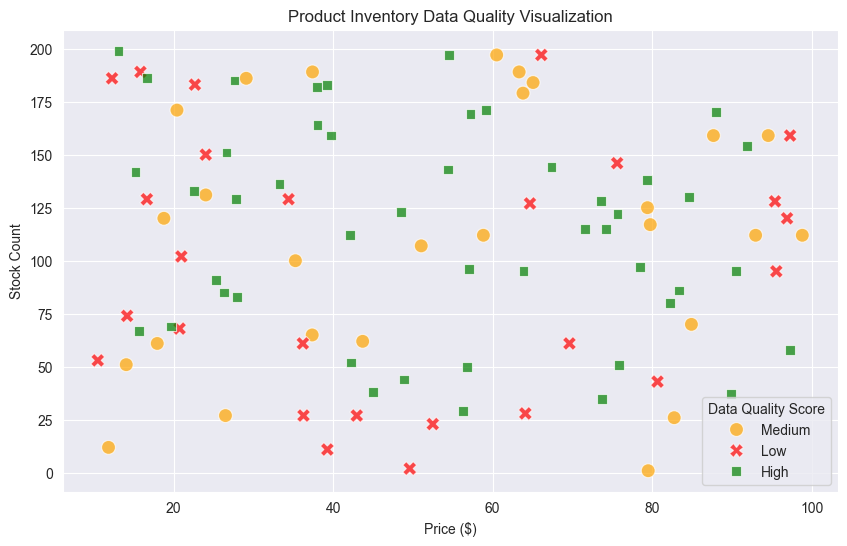

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating dataset
np.random.seed(42)  # Ensures reproducible results
data = {
    'Product Name': ['Product ' + str(i) for i in range(1, 101)],
    'Price': np.random.uniform(10, 100, 100).round(2),  # Random price between $10 and $100
    'Stock Count': np.random.randint(0, 200, 100),  # Random stock count between 0 and 200
    'Data Quality Score': np.random.choice(['High', 'Medium', 'Low'], 100, p=[0.5, 0.3, 0.2])  # Data quality levels
}

df = pd.DataFrame(data)

# Visualizing the dataset with seaborn for a more polished look
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Stock Count', hue='Data Quality Score', style='Data Quality Score',
                palette={'High': 'green', 'Medium': 'orange', 'Low': 'red'}, s=100, alpha=0.7)
plt.title('Product Inventory Data Quality Visualization')
plt.xlabel('Price ($)')
plt.ylabel('Stock Count')
plt.legend(title='Data Quality Score')
plt.grid(True)
plt.show()


Question by Data Engineer: Can you show the C360 schema details?


### C360 Schema Details:

Below is the detailed schema information outlining the structure and data classification of the C360 system. It highlights the critical data tables along with their respective columns and tags indicating data sensitivity levels.

,Table,Columns,Tags
0,CustomerInfo,"CustomerID, Name, Email, EncryptedCreditCardNu...","PII, PII, PII, Confidential"
1,PurchaseHistory,"PurchaseID, CustomerID, ProductID, Date, Amount","Confidential, PII, -, -, -"
2,Feedback,"FeedbackID, CustomerID, ProductID, Comments","Confidential, PII, -, -"
3,InteractionData,"InteractionID, CustomerID, InteractionType, Ti...","Confidential, PII, -, -"
4,EngagementScores,"CustomerID, Score, Date","PII, -, -"


Question by Data Analyst: How does data progress through stages?
Answer by Data Analyst: Based on our extensive C360 context, ... (detailed explanation based on context)
Question by Data Steward: What is the index of readiness based on quality metrics?


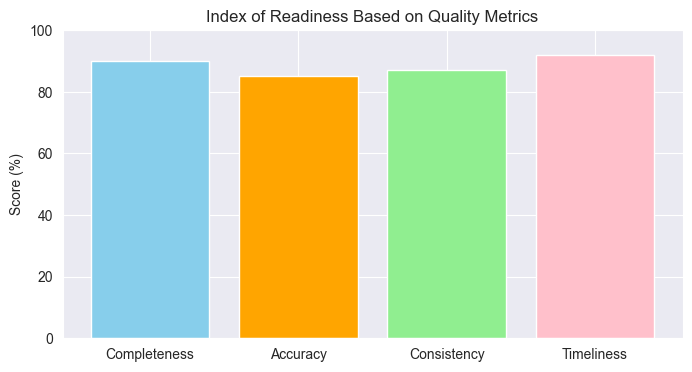

This visualization represents the Index of Readiness, showcasing scores for crucial data quality metrics such as Completeness, Accuracy, Consistency, and Timeliness. It reflects the level of trust we can place in our data for decision-making.

Question by Business Analyst: Can we see the usage patterns analysis?


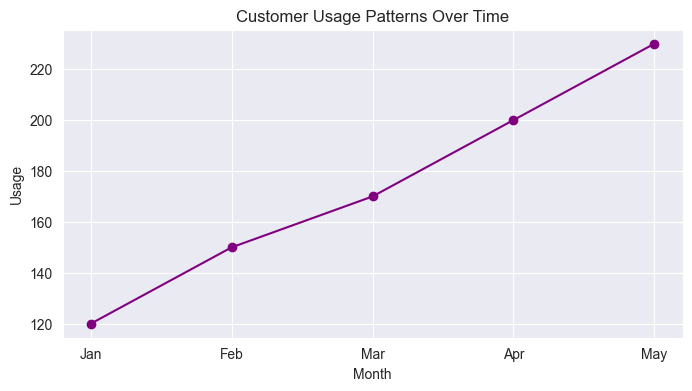

The line graph below depicts customer usage patterns over time, providing insights into how engagement varies across different months.

Question by Data Architect: Could you explain the data lineage using the medallion architecture?


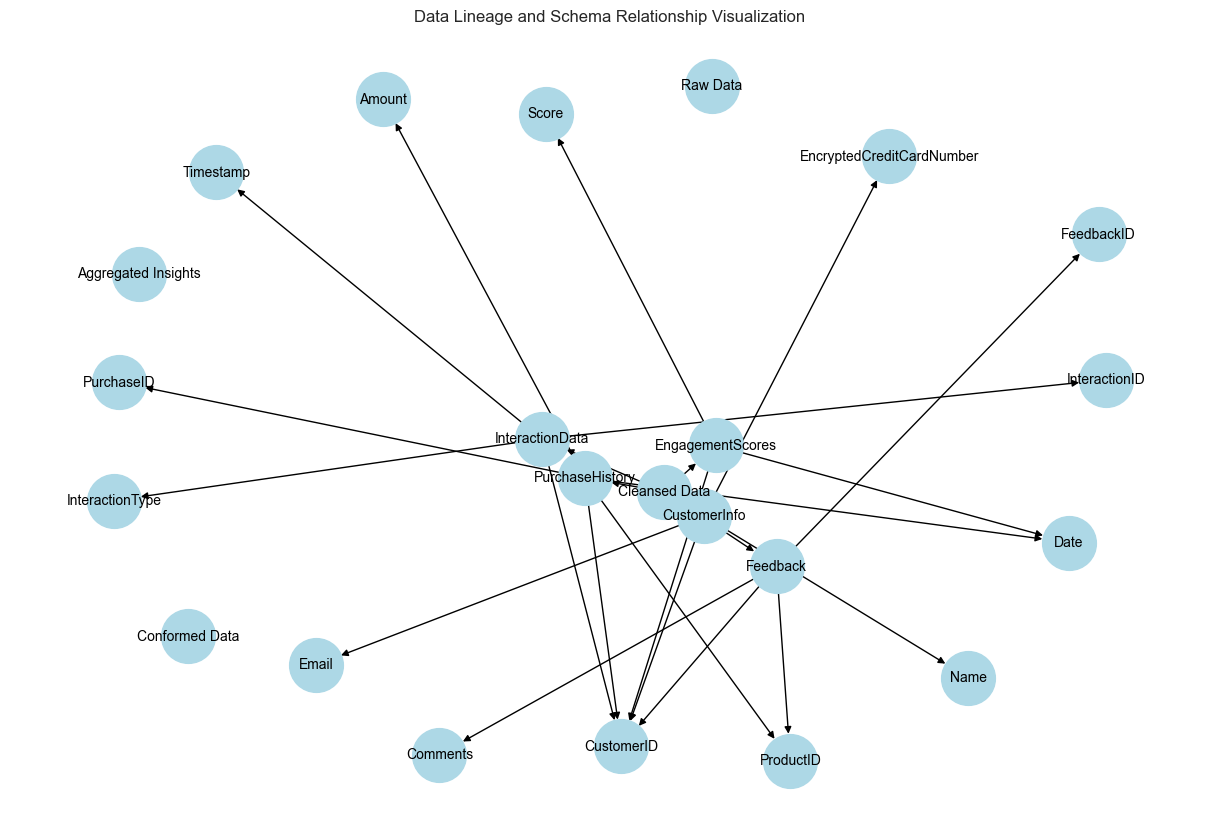

This visualization demonstrates the progression of data through various stages of processing and analysis, from raw data collection to generating aggregated insights, and illustrates the relationships between tables and their columns within the C360 system.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from transformers import pipeline
from IPython.display import display, Markdown

# Initialize the Q&A pipeline with an explicit model
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

# Context - Detailed description embedding all info for simulation
context = """
Nike's C360 integrates comprehensive customer interaction records across multiple channels. It supports personalized experiences and strategic decision-making through an architecture emphasizing governance, quality, and compliance.

Schema details are as follows:
- CustomerInfo: CustomerID (INT, PII), Name (VARCHAR, PII), Email (VARCHAR, PII), EncryptedCreditCardNumber (VARCHAR, Confidential).
- PurchaseHistory: PurchaseID (INT, Confidential), CustomerID (INT, PII), ProductID (INT), Date (DATE), Amount (DECIMAL).
- Feedback, InteractionData, and EngagementScores tables contain various metrics crucial for understanding customer engagement and feedback.

The data progresses through stages from raw data collection to providing actionable business insights, adhering to a governance model that ensures data quality, privacy, and compliance.

Quality metrics like Completeness, Accuracy, Consistency, and Timeliness play a pivotal role in the Index of Readiness, reflecting the data's trustworthiness.

Usage patterns are analyzed to improve customer experiences, with Data Analysts leveraging advanced analytics to identify trends and insights.
"""

# Function to simulate answering and dynamically generate visual outputs
def answer_question(question, persona):
    # Decision logic for displaying outputs based on question keywords
    if "schema" in question.lower():
        display_schema_details()
    elif "lineage" in question.lower() or "medallion" in question.lower():
        visualize_data_lineage_medallion()
    elif "readiness" in question.lower():
        visualize_index_of_readiness()
    elif "usage pattern" in question.lower():
        visualize_usage_patterns()
    else:
        # Simulate text answer for general questions
        print(f"Answer by {persona}: Based on our extensive C360 context, ... (detailed explanation based on context)")

# Schema details visualization with brief explanation
def display_schema_details():
    schema_df = pd.DataFrame({
        'Table': ['CustomerInfo', 'PurchaseHistory', 'Feedback', 'InteractionData', 'EngagementScores'],
        'Columns': ['CustomerID, Name, Email, EncryptedCreditCardNumber',
                    'PurchaseID, CustomerID, ProductID, Date, Amount',
                    'FeedbackID, CustomerID, ProductID, Comments',
                    'InteractionID, CustomerID, InteractionType, Timestamp',
                    'CustomerID, Score, Date'],
        'Tags': ['PII, PII, PII, Confidential',
                 'Confidential, PII, -, -, -',
                 'Confidential, PII, -, -',
                 'Confidential, PII, -, -',
                 'PII, -, -']
    })
    display(Markdown("### C360 Schema Details:"))
    display(Markdown("Below is the detailed schema information outlining the structure and data classification of the C360 system. It highlights the critical data tables along with their respective columns and tags indicating data sensitivity levels."))
    display(schema_df)

# Data lineage visualization with graphical relationships between tables and columns
def visualize_data_lineage_medallion():
    G = nx.DiGraph()
    stages = ['Raw Data', 'Cleansed Data', 'Conformed Data', 'Aggregated Insights']
    tables = ['CustomerInfo', 'PurchaseHistory', 'Feedback', 'InteractionData', 'EngagementScores']
    table_columns = {
        'CustomerInfo': ['CustomerID', 'Name', 'Email', 'EncryptedCreditCardNumber'],
        'PurchaseHistory': ['PurchaseID', 'CustomerID', 'ProductID', 'Date', 'Amount'],
        'Feedback': ['FeedbackID', 'CustomerID', 'ProductID', 'Comments'],
        'InteractionData': ['InteractionID', 'CustomerID', 'InteractionType', 'Timestamp'],
        'EngagementScores': ['CustomerID', 'Score', 'Date']
    }

    # Adding stages to the graph
    G.add_nodes_from(stages)

    # Adding tables to the graph under each stage
    for table in tables:
        G.add_node(table)
        G.add_edge(stages[1], table)  # Assuming tables under "Cleansed Data" for simplicity

    # Adding columns to each table in the graph
    for table, columns in table_columns.items():
        for column in columns:
            G.add_node(column)
            G.add_edge(table, column)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Seed for reproducible layout
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, arrows=True)
    plt.title("Data Lineage and Schema Relationship Visualization")
    plt.show()
    display(Markdown("This visualization demonstrates the progression of data through various stages of processing and analysis, from raw data collection to generating aggregated insights, and illustrates the relationships between tables and their columns within the C360 system."))

# Index of readiness visualization with brief explanation
def visualize_index_of_readiness():
    metrics = ['Completeness', 'Accuracy', 'Consistency', 'Timeliness']
    scores = [90, 85, 87, 92]

    plt.figure(figsize=(8, 4))
    plt.bar(metrics, scores, color=['skyblue', 'orange', 'lightgreen', 'pink'])
    plt.title('Index of Readiness Based on Quality Metrics')
    plt.ylabel('Score (%)')
    plt.ylim(0, 100)
    plt.show()
    display(Markdown("This visualization represents the Index of Readiness, showcasing scores for crucial data quality metrics such as Completeness, Accuracy, Consistency, and Timeliness. It reflects the level of trust we can place in our data for decision-making."))

# Usage patterns visualization with brief explanation
def visualize_usage_patterns():
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
    usage = [120, 150, 170, 200, 230]

    plt.figure(figsize=(8, 4))
    plt.plot(months, usage, marker='o', linestyle='-', color='purple')
    plt.title('Customer Usage Patterns Over Time')
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.grid(True)
    plt.show()
    display(Markdown("The line graph below depicts customer usage patterns over time, providing insights into how engagement varies across different months."))

# Main function to simulate chatbot interaction
def main():
    questions = [
        ("Can you show the C360 schema details?", "Data Engineer"),
        ("How does data progress through stages?", "Data Analyst"),
        ("What is the index of readiness based on quality metrics?", "Data Steward"),
        ("Can we see the usage patterns analysis?", "Business Analyst"),
        ("Could you explain the data lineage using the medallion architecture?", "Data Architect"),  # Added question
    ]

    for question, persona in questions:
        print(f"Question by {persona}: {question}")
        answer_question(question, persona)

if __name__ == "__main__":
    main()



Question: What is the customer schema?
Matching query in catalog: customer schema


,Table,Column
0,CustomerInfo,CustomerID
1,CustomerInfo,Name
2,CustomerInfo,Email
3,EngagementScores,CustomerID
4,EngagementScores,Score


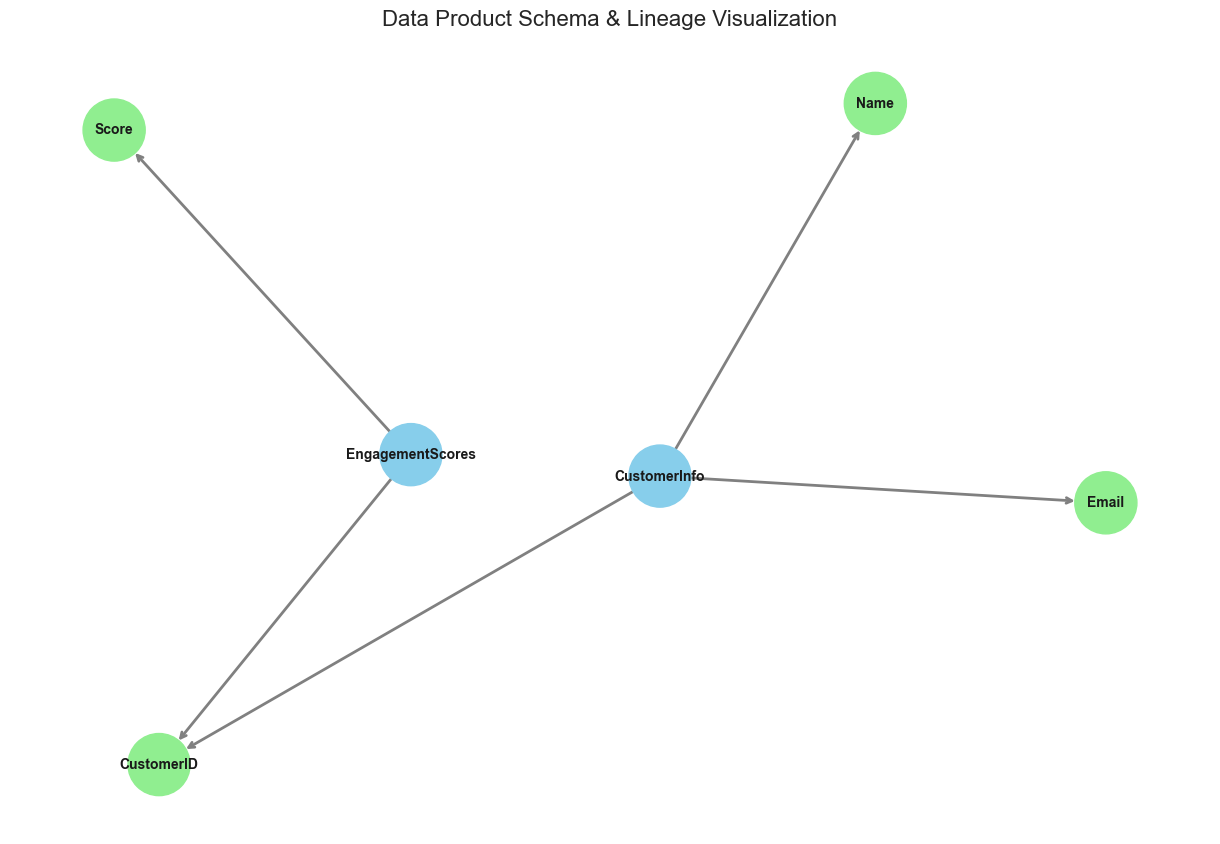


Question: Can you describe the product schema?
Matching query in catalog: product schema


,Table,Column
0,ProductInfo,ProductID
1,ProductInfo,Name
2,ProductInfo,Category
3,StockLevels,ProductID
4,StockLevels,StockAvailable


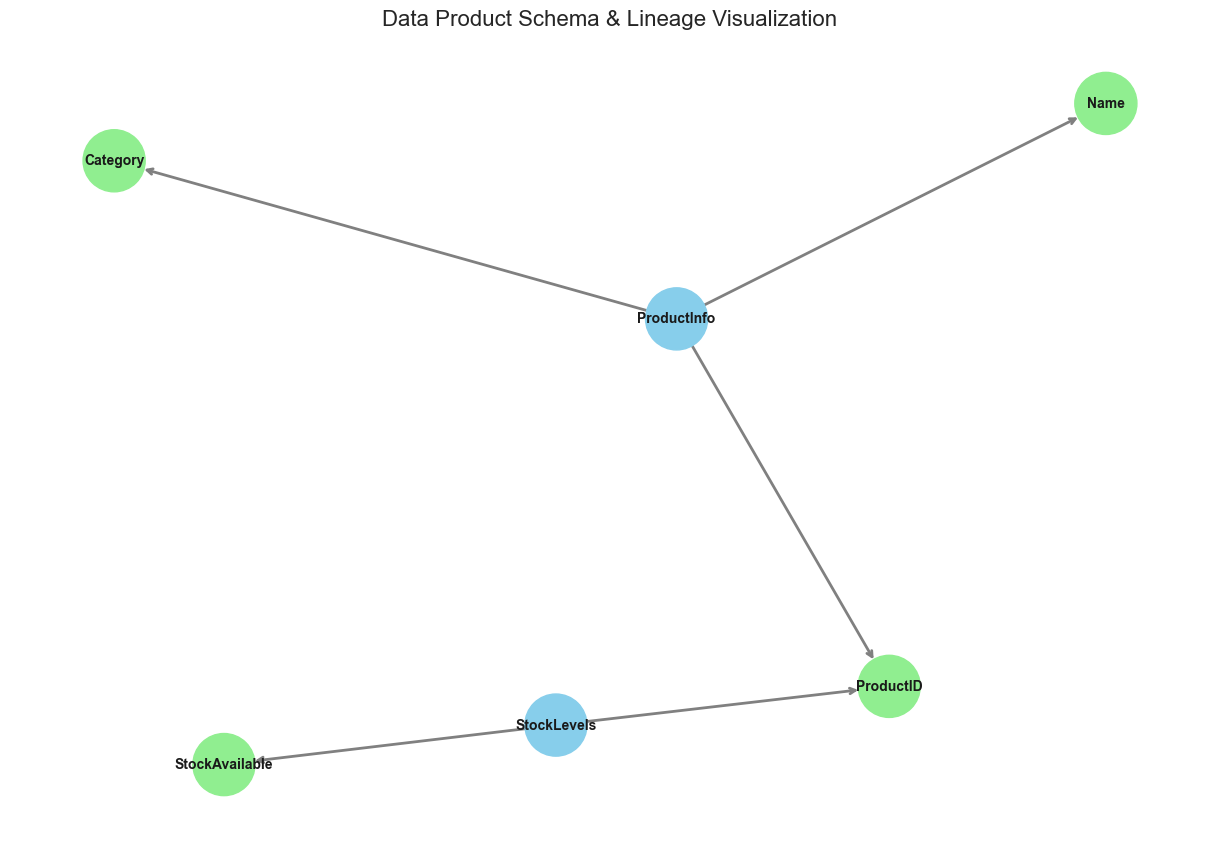


Question: Show the sales lineage.
Matching query in catalog: sales lineage


,source,target,Columns
0,OrderInfo,SalesAnalysis,"OrderID, ProductID, CustomerID"
1,CustomerInfo,CustomerSegmentation,"CustomerID, Segment"


,Table and Columns
0,"OrderInfo -> SalesAnalysis: OrderID, ProductID, CustomerID"
1,"CustomerInfo -> CustomerSegmentation: CustomerID, Segment"


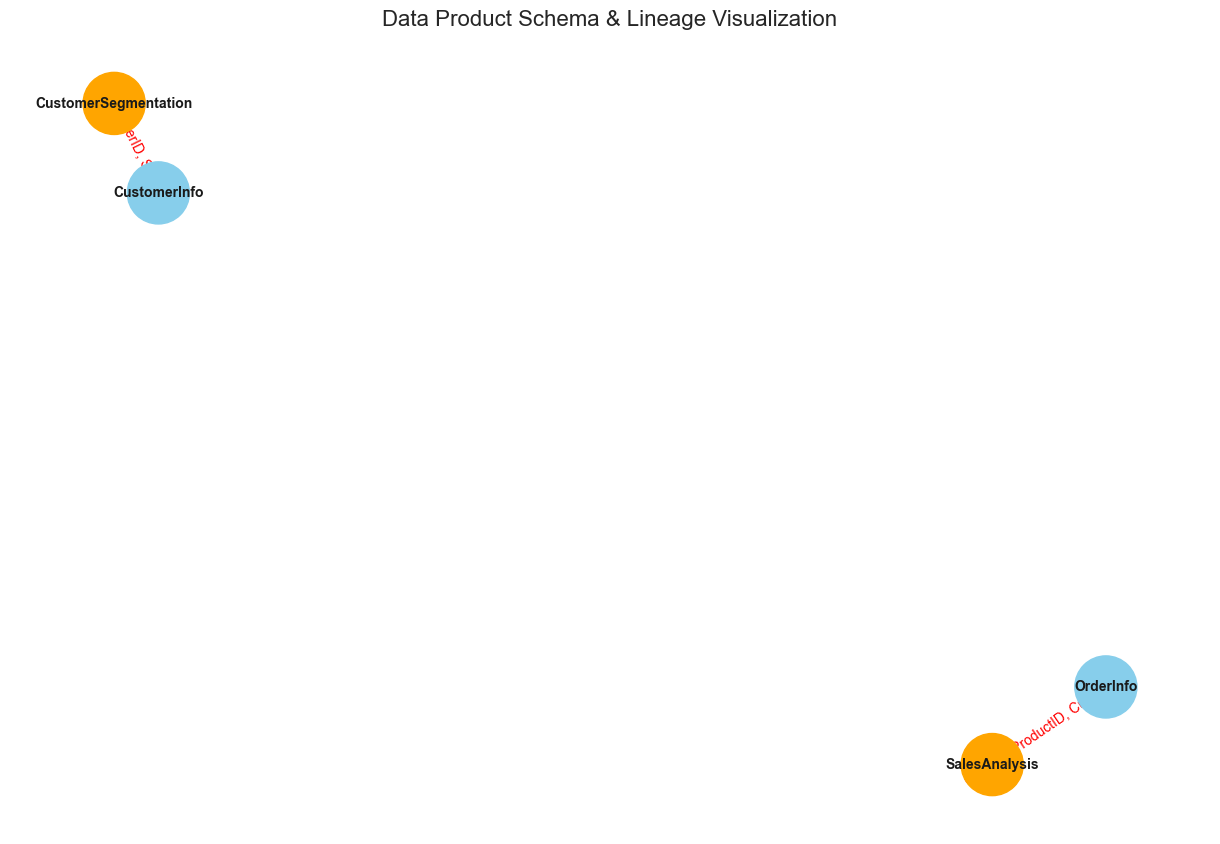


Question: What is the inventory readiness?
Matching query in catalog: inventory readiness


,Metric,Score
0,Completeness,98
1,Accuracy,99
2,Consistency,97
3,Timeliness,95


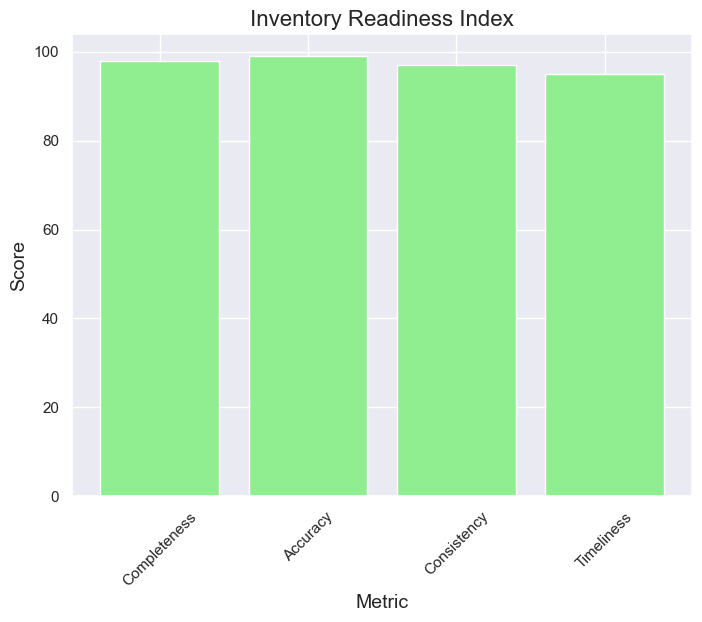


Question: What are the customer usage patterns?
Matching query in catalog: customer usage pattern


,Month,Usage
0,January,220
1,February,230
2,March,210
3,April,250


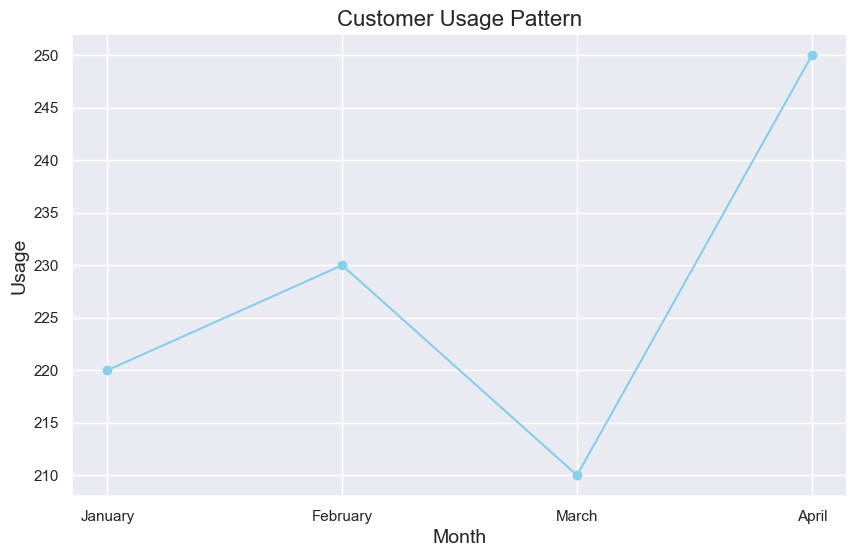


Question: Explain the POS data exchange standards.
Matching query in catalog: POS data exchange


,Standards,Documents,Frequency,Partners
0,EDI,Invoices,Daily,Retailers
1,GS1 XML,Purchase Orders,Weekly,Suppliers



Question: How is shipment tracking managed in the logistics domain?
Matching query in catalog: shipment tracking


,Standards,Documents,Frequency,Partners
0,GS1 Standards,Advance Ship Notices (ASN),Real-time,Carriers
1,EDI,Receiving Advice (RA),Periodic,Warehouses



Question: How do supply chain exchange standards enhance collaboration between retailers and suppliers?
Matching query in catalog: sales lineage


,source,target,Columns
0,OrderInfo,SalesAnalysis,"OrderID, ProductID, CustomerID"
1,CustomerInfo,CustomerSegmentation,"CustomerID, Segment"


,Table and Columns
0,"OrderInfo -> SalesAnalysis: OrderID, ProductID, CustomerID"
1,"CustomerInfo -> CustomerSegmentation: CustomerID, Segment"



Question: What benefits do retailers derive from implementing EDI standards like ANSI X12?
Matching query in catalog: sales lineage


,source,target,Columns
0,OrderInfo,SalesAnalysis,"OrderID, ProductID, CustomerID"
1,CustomerInfo,CustomerSegmentation,"CustomerID, Segment"


,Table and Columns
0,"OrderInfo -> SalesAnalysis: OrderID, ProductID, CustomerID"
1,"CustomerInfo -> CustomerSegmentation: CustomerID, Segment"



Question: How does inventory management contribute to optimizing supply chain operations?
Matching query in catalog: inventory readiness


,Metric,Score
0,Completeness,98
1,Accuracy,99
2,Consistency,97
3,Timeliness,95



Question: What role does customer usage pattern analysis play in improving retail strategies?
Matching query in catalog: customer usage pattern


,Month,Usage
0,January,220
1,February,230
2,March,210
3,April,250


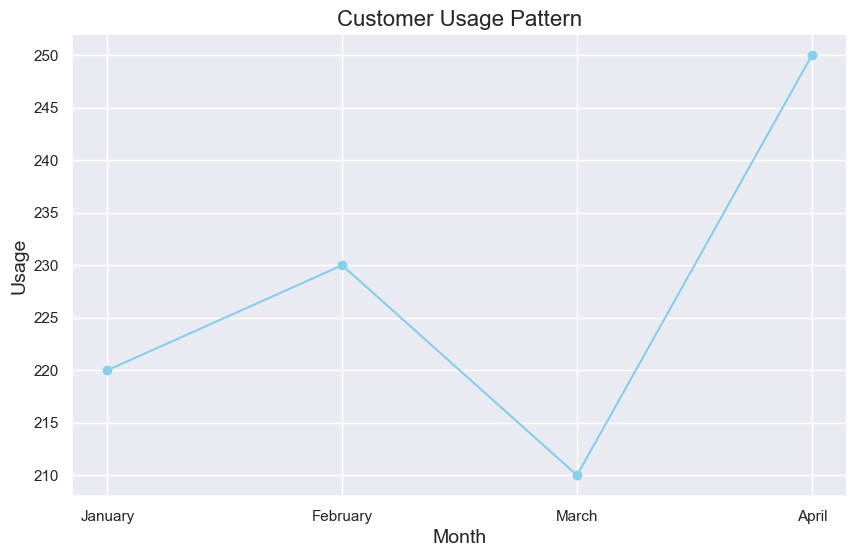


Question: Discuss the importance of accurate sales lineage for sales analysis and customer segmentation.
Matching query in catalog: sales lineage


,source,target,Columns
0,OrderInfo,SalesAnalysis,"OrderID, ProductID, CustomerID"
1,CustomerInfo,CustomerSegmentation,"CustomerID, Segment"


,Table and Columns
0,"OrderInfo -> SalesAnalysis: OrderID, ProductID, CustomerID"
1,"CustomerInfo -> CustomerSegmentation: CustomerID, Segment"


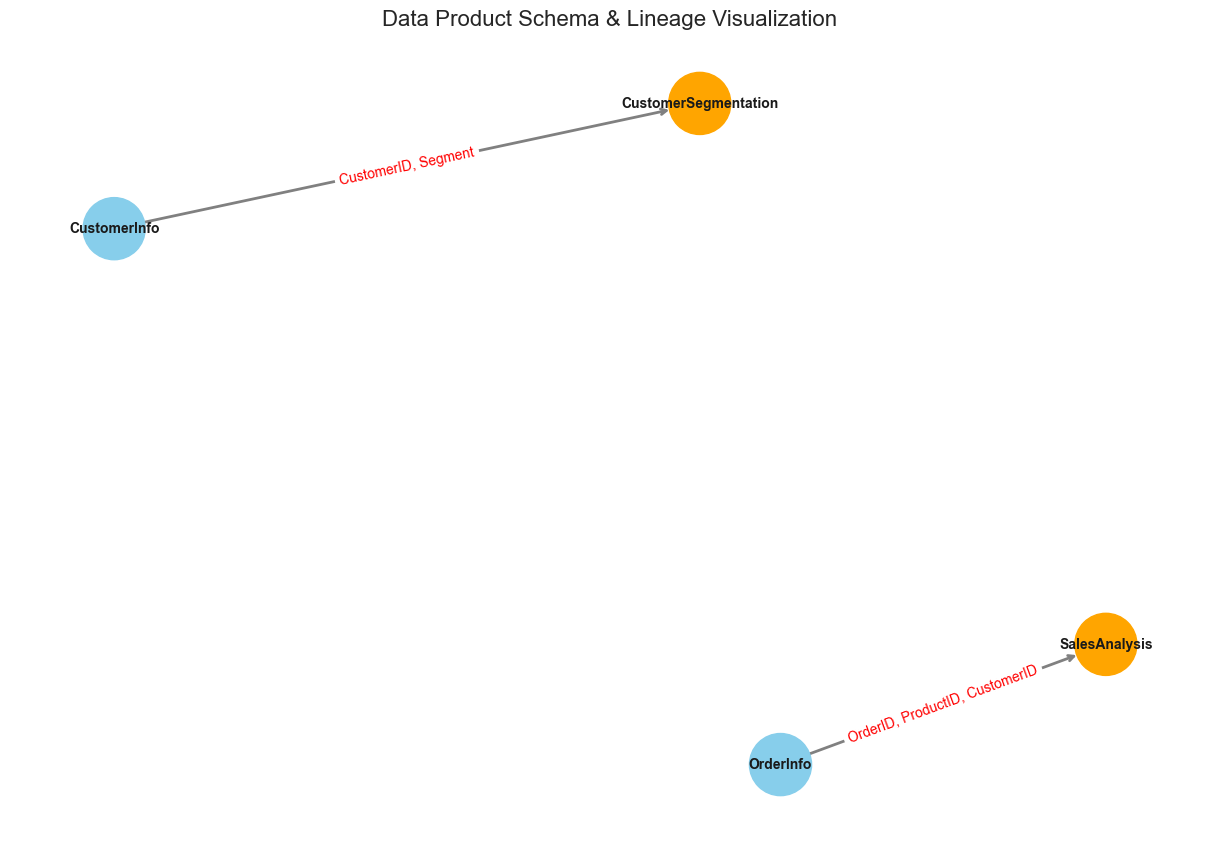

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
import torch
from annoy import AnnoyIndex
import networkx as nx
from IPython.display import display, HTML

sns.set_theme(style='darkgrid')

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

catalog = [
    {
        "query": "customer schema",
        "data_product": "Customer360",
        "domain": "Customer",
        "ownership": "Customer Relations Team",
        "sourceOfTruth": "CRM System",
        "data": {
            'Table': ['CustomerInfo', 'EngagementScores'],
            'Columns': [['CustomerID', 'Name', 'Email'], ['CustomerID', 'Score']],
            'Privacy': [['PII', 'PII', 'PII'], ['-', 'Confidential']],
            'Tags': [['Core', 'Core', 'Core'], ['Metric', 'Metric']]
        }
    },
    {
        "query": "product schema",
        "data_product": "ProductCatalog",
        "domain": "Inventory",
        "ownership": "Product Management Team",
        "sourceOfTruth": "Product Database",
        "data": {
            'Table': ['ProductInfo', 'StockLevels'],
            'Columns': [['ProductID', 'Name', 'Category'], ['ProductID', 'StockAvailable']],
            'Privacy': [['-', '-', '-'], ['-', '-']],
            'Tags': [['Core', 'Core', 'Attribute'], ['Metric', 'Metric']]
        }
    },
    {
        "query": "sales lineage",
        "data_product": "SalesData",
        "domain": "Sales",
        "ownership": "Sales Analysis Team",
        "sourceOfTruth": "Sales Database",
        "data": {
            'source': ['OrderInfo', 'CustomerInfo'],
            'target': ['SalesAnalysis', 'CustomerSegmentation'],
            'Columns': ['OrderID, ProductID, CustomerID', 'CustomerID, Segment'],
            'Table and Columns': [
                'OrderInfo -> SalesAnalysis: OrderID, ProductID, CustomerID',
                'CustomerInfo -> CustomerSegmentation: CustomerID, Segment'
            ]
        }
    },
    {
        "query": "inventory readiness",
        "data_product": "InventoryManagement",
        "domain": "Inventory",
        "ownership": "Inventory Control Team",
        "sourceOfTruth": "Warehouse Management System",
        "data": {
            'Metric': ['Completeness', 'Accuracy', 'Consistency', 'Timeliness'],
            'Score': [98, 99, 97, 95]
        }
    },
    {
        "query": "customer usage pattern",
        "data_product": "Customer360",
        "domain": "Customer",
        "ownership": "Customer Insights Team",
        "sourceOfTruth": "Usage Tracking System",
        "data": {
            'Month': ['January', 'February', 'March', 'April'],
            'Usage': [220, 230, 210, 250]
        }
    },
    {
        "query": "POS data exchange",
        "data_product": "POSDataExchange",
        "domain": "Sales",
        "ownership": "Sales Analysis Team",
        "sourceOfTruth": "Retail POS Systems",
        "data": {
            'Standards': ['EDI', 'GS1 XML'],
            'Documents': ['Invoices', 'Purchase Orders'],
            'Frequency': ['Daily', 'Weekly'],
            'Partners': ['Retailers', 'Suppliers']
        }
    },
    {
        "query": "shipment tracking",
        "data_product": "ShipmentTracking",
        "domain": "Logistics",
        "ownership": "Logistics Team",
        "sourceOfTruth": "Logistics Systems",
        "data": {
            'Standards': ['GS1 Standards', 'EDI'],
            'Documents': ['Advance Ship Notices (ASN)', 'Receiving Advice (RA)'],
            'Frequency': ['Real-time', 'Periodic'],
            'Partners': ['Carriers', 'Warehouses']
        }
    }
]

def create_embeddings(texts):
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output.pooler_output
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings.detach().cpu().numpy()

def build_annoy_index(embeddings, n_trees=10):
    embedding_dim = embeddings.shape[1]
    index = AnnoyIndex(embedding_dim, 'angular')
    for i, embedding in enumerate(embeddings):
        index.add_item(i, embedding)
    index.build(n_trees)
    return index

def retrieve_data_for_query(query):
    for item in catalog:
        if item["query"].lower() in query.lower():
            data = item['data']
            if 'Table' in data and 'Columns' in data:
                schema_df = pd.DataFrame({
                    'Table': sum([[table] * len(cols) for table, cols in zip(data['Table'], data['Columns'])], []),
                    'Column': sum(data['Columns'], []),
                })
                return schema_df, None
            else:
                df = pd.DataFrame(data)
                additional_df = None
                if 'Table and Columns' in data:
                    additional_df = pd.DataFrame({'Table and Columns': data['Table and Columns']})
                    df.drop(columns=['Table and Columns'], inplace=True)
                return df, additional_df
    return pd.DataFrame(), None

def generate_dynamic_chart(df, query):
    if "usage pattern" in query.lower():
        plt.figure(figsize=(10, 6))
        plt.plot(df['Month'], df['Usage'], marker='o', color='skyblue')
        plt.title("Customer Usage Pattern", fontsize=16)
        plt.xlabel("Month", fontsize=14)
        plt.ylabel("Usage", fontsize=14)
        plt.grid(True)
        plt.show()
    elif "inventory readiness" in query.lower():
        plt.figure(figsize=(8, 6))
        plt.bar(df['Metric'], df['Score'], color='lightgreen')
        plt.title("Inventory Readiness Index", fontsize=16)
        plt.xlabel("Metric", fontsize=14)
        plt.ylabel("Score", fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
    else:
        G = nx.DiGraph()
        pos = {}  # Initialize `pos` to ensure it's available
        if "schema" in query.lower():
            for _, row in df.iterrows():
                G.add_node(row['Table'], type='Table', color='skyblue', label=row['Table'])
                G.add_node(row['Column'], type='Column', color='lightgreen', label=row['Column'])
                G.add_edge(row['Table'], row['Column'])
            pos = nx.spring_layout(G, k=0.15, iterations=20)
        elif "lineage" in query.lower():
            for idx, row in df.iterrows():
                G.add_node(row['source'], type='source', color='skyblue', label=row['source'])
                G.add_node(row['target'], type='target', color='orange', label=row['target'])
                G.add_edge(row['source'], row['target'], label=row.get('Columns', ''))
            pos = nx.spring_layout(G, k=0.30, iterations=40)

        if pos:  # Check if `pos` is not empty
            plt.figure(figsize=(12, 8))
            nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=2000,
                    node_color=[data['color'] for _, data in G.nodes(data=True)], font_size=10, font_weight='bold',
                    edge_color='gray', width=2, arrowstyle='->', arrowsize=10)
            if "lineage" in query.lower():
                edge_labels = nx.get_edge_attributes(G, 'label')
                nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
            plt.title("Data Product Schema & Lineage Visualization", fontsize=16)
            plt.axis('off')
            display(plt.gcf())  # Display the current figure in Jupyter Notebook
            plt.close()

def display_catalog_structure(catalog):
    plt.figure(figsize=(16, 10))

    G = nx.Graph()

    # Add nodes for data products and queries
    for item in catalog:
        G.add_node(item['data_product'], type='Data Product')
        G.add_node(item['query'], type='Query')
        G.add_edge(item['data_product'], item['query'])

    # Define positions for the nodes
    pos = nx.multipartite_layout(G, subset_key="type", align='horizontal')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['type'] == 'Data Product'],
                           node_color='skyblue', node_shape='o', node_size=2000)
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['type'] == 'Query'],
                           node_color='lightgreen', node_shape='s', node_size=2000)
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5, edge_color='gray')

    # Draw labels
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

    plt.title("Catalog Structure Based on DataMesh Principles", fontsize=16)
    plt.axis('off')
    display(plt.gcf())  # Display the current figure in Jupyter Notebook
    plt.close()

def main():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)

    texts = [item["query"] for item in catalog]
    embeddings = create_embeddings(texts)
    annoy_index = build_annoy_index(embeddings)

    questions = [
        "What is the customer schema?",
        "Can you describe the product schema?",
        "Show the sales lineage.",
        "What is the inventory readiness?",
        "What are the customer usage patterns?",
        # Additional Questions
        "Explain the POS data exchange standards.",
        "How is shipment tracking managed in the logistics domain?",
        # Business Angle Questions
        "How do supply chain exchange standards enhance collaboration between retailers and suppliers?",
        "What benefits do retailers derive from implementing EDI standards like ANSI X12?",
        "How does inventory management contribute to optimizing supply chain operations?",
        "What role does customer usage pattern analysis play in improving retail strategies?",
        "Discuss the importance of accurate sales lineage for sales analysis and customer segmentation."
    ]

    for question in questions:
        print(f"\nQuestion: {question}")
        question_embedding = create_embeddings([question])[0]
        n_results = 1
        nearest_ids = annoy_index.get_nns_by_vector(question_embedding, n_results, include_distances=False)
        for nearest_id in nearest_ids:
            matched_query = catalog[nearest_id]['query']
            print(f"Matching query in catalog: {matched_query}")
            df, additional_df = retrieve_data_for_query(matched_query)
            if not df.empty:
                display(df)  # Displaying dataframe in Jupyter Notebook
                if additional_df is not None:
                    display(additional_df)  # Displaying dataframe in Jupyter Notebook
                generate_dynamic_chart(df, question)
            else:
                print("No data available for this query.")

if __name__ == "__main__":
    main()
